### Project Intro <br>
You work for the online store Ice, which sells video games all over the world. User and expert reviews, genres, platforms (e.g. Xbox or PlayStation), and historical data on game sales are available from open sources. You need to identify patterns that determine whether a game succeeds or not. This will allow you to spot potential big winners and plan advertising campaigns. <br>
In front of you is data going back to 2016. Let’s imagine that it’s December 2016 and you’re planning a campaign for 2017. <br>
(The important thing is to get experience working with data. It doesn't really matter whether you're forecasting 2017 sales based on data from 2016 or 2017 sales based on data from 2016.) <br>
The dataset contains the abbreviation ESRB. The Entertainment Software Rating Board evaluates a game's content and assigns an age rating such as Teen or Mature. <br>
<br>
To identify patterns that determine whether a game will be successful or not, one approach would be to perform data analysis on the available data. This can be done by looking at various factors such as user and expert reviews, genres, platforms, and historical data on game sales. By examining the relationships between these factors and game sales, patterns can be identified that can help predict the success of a game.

To identify patterns that determine whether a game will be successful or not, we will perform data analysis on the available data. This can be done by looking at various factors such as user and expert reviews, genres, platforms, and historical data on game sales. By examining the relationships between these factors and game sales, patterns can be identified that can help predict the success of a game.

Our first step is to clean and preprocess the data to ensure that it is in a usable format. This could involve removing any missing or incomplete data, and ensuring that the data is consistent across all entries.

Next, various statistical techniques can be applied to the data to identify any relationships between the different factors and game sales. This could involve using techniques such as regression analysis, correlation analysis, and clustering to identify patterns in the data.

Once these patterns have been identified, they can be used to create a model that can be used to predict the success of a game based on its characteristics. This model can then be tested and refined using additional data, to ensure that it is accurate and reliable.

Overall, the goal of this project would be to use data analysis to identify patterns that determine the success of a video game, and to use these patterns to create a model that can be used to predict the success of future games.

In [1]:
# pip install plotly

In [2]:
# Load libraries
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import timedelta
import seaborn as sns
import math
import random
import calendar
# from scipy.stats import ttest_ind
# Adding Plotly library for Gannt charts
import plotly.figure_factory as ff
import plotly


# Step 1. Open the data file and study the general information <br>
File path:
/datasets/games.csv . Download dataset



In [3]:
# Load the data files into different DataFrames
# /datasets/megaline_calls.csv

try:
    df_games = pd.read_csv('https://code.s3.yandex.net//datasets/games.csv')
except:
    df_games = pd.read_csv('/datasets/games.csv ')
# else:
#     # Do smth if there is no exception.
# finally:
#     # Do something no matter what.

### Note for the Future - draft code to save the CSV file to the local directory


### Note for the Future - draft code to save the CSV file to the local directory

In [4]:
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
df_games.head(-10)

Name Platform  \
0                                             Wii Sports      Wii   
1                                      Super Mario Bros.      NES   
2                                         Mario Kart Wii      Wii   
3                                      Wii Sports Resort      Wii   
4                               Pokemon Red/Pokemon Blue       GB   
...                                                  ...      ...   
16700                           Mezase!! Tsuri Master DS       DS   
16701  Eiyuu Densetsu: Sora no Kiseki Material Collec...      PSP   
16702                            STORM: Frontline Nation       PC   
16703                                   Strawberry Nauts      PSV   
16704                                           Plushees       DS   

       Year_of_Release         Genre  NA_sales  EU_sales  JP_sales  \
0               2006.0        Sports     41.36     28.96      3.77   
1               1985.0      Platform     29.08      3.58      6.81   
2               2008.0        Racing     15.68     12.76      3.79   
3               2009.0        Sports     15.61     10.93      3.28   
4               1996.0  Role-Playing     11.27      8.89     10.22   
...                ...           ...       ...       ...       ...   
16700           2009.0        Sports      0.00      0.00      0.01   
16701           2007.0  Role-Playing      0.00      0.00      0.01   
16702           2011.0      Strategy      0.00      0.01      0.00   
16703           2016.0     Adventure      0.00      0.00      0.01   
16704           2008.0    Simulation      0.01      0.00      0.00   

       Other_sales  Critic_Score User_Score Rating  
0             8.45          76.0          8      E  
1             0.77           NaN        NaN    NaN  
2             3.29          82.0        8.3      E  
3             2.95          80.0          8      E  
4             1.00           NaN        NaN    NaN  
...            ...           ...        ...    ...  
16700         0.00           NaN        NaN    NaN  
16701         0.00           NaN        NaN    NaN  
16702         0.00          60.0        7.2   E10+  
16703         0.00           NaN        NaN    NaN  
16704         0.00           NaN        tbd      E  

[16705 rows x 11 columns]

### Initial Review of the Data
Now that the file has been opened, it is important to take a look at the overall structure of the data, including the number of entries, the types of data included, and any missing or incomplete data. This can provide a high-level overview of the data, and can help identify any potential issues or challenges that may need to be addressed in the next steps of the project.

Additionally, looking at the general information in the data file can provide insight into the types of analysis that may be possible with the data. For example, if the data includes user and expert reviews, it may be possible to use this data to analyze the relationship between review scores and game sales.

Overall, the goal of this first step is to gain a high-level understanding of the data, and to identify any potential issues or opportunities that may be relevant for the rest of the project.

### What is a ESRB rating?
While reviwing the data I found myself wondering what the different game ratings mean. <br>
Here is a chart and summary I pulled from the web for reference:<br>
<br>
The Entertainment Software Rating Board (ESRB) is a self-regulatory organization that assigns age and content ratings to video games and apps in order to provide guidance to consumers, particularly parents, about the suitability of the game or app for their children. The ESRB ratings guide includes the following ratings: <br>
EC (Early Childhood)<br>
E (Everyone) <br>
E10+ (Everyone 10 and older) <br>
T (Teen) Content is generally suitable for ages 13 and up. <br>
M (Mature) Content is generally suitable for ages 17 and up.<br>
AO (Adults Only) <br>
RP (Rating Pending). <br>
<br>
The ratings indicate the age group for which the game or app is appropriate and provide information about the game or app's content, such as the presence of violence, sexual content, or strong language.


# Step 2. Prepare the data

In [6]:
# Replace the column names (make them lowercase)
df_games.columns = df_games.columns.str.lower()



In [7]:
df_games.head()

# list all values in rating
df_games['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [8]:
# add a column for esrb rating as a number
# ratings should be in this order from lowest to highest

# EC (Early Childhood)<br>
# E (Everyone) <br>
# E10+ (Everyone 10 and older) <br>
# T (Teen) Content is generally suitable for ages 13 and up. <br>
# M (Mature) Content is generally suitable for ages 17 and up.<br>
# AO (Adults Only) <br>
# RP (Rating Pending)

ratings = ['NA','EC', 'E', 'E10+', 'T', 'M', 'AO', 'RP']
esrb_nums = [0, 1, 2, 3, 4, 5, 6, 7]

# map ratings to esrb_nums
df_games['esrb_num'] = df_games['rating'].map(dict(zip(ratings, esrb_nums)))

# fill NaN values with 0
df_games['esrb_num'] = df_games['esrb_num'].fillna(0)

# Fill Rating NaN values with NA
df_games['rating'] = df_games['rating'].fillna('NA')

# Create a dictionary of ratings and esrb_nums
dict(zip(ratings, esrb_nums))

# convert to int
df_games['esrb_num'] = df_games['esrb_num'].astype(int)

# df_games.head(15)

In [9]:
# How many times does tbd appear in the user_score column?
df_games['user_score'].value_counts()

# 2424





tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
0.9       2
2.3       2
0.6       2
0         1
9.7       1
Name: user_score, Length: 96, dtype: int64

### We need to do a little bit of diffing into the data to determine how best to work with these tbd values

In [10]:
# show me the dates and titles associated only with tbd - print the restults
df_tbd_analysis = df_games[df_games['user_score'] == 'tbd'][['name', 'year_of_release']]
print(df_tbd_analysis.head())

                                         name  year_of_release
119                             Zumba Fitness           2010.0
301            Namco Museum: 50th Anniversary           2005.0
520                           Zumba Fitness 2           2011.0
645                              uDraw Studio           2010.0
657  Frogger's Adventures: Temple of the Frog              NaN


In [11]:
# df_tbd_analysis.info()

# What was the most recent year of release for a game with tbd in the user_score column?
df_tbd_analysis['year_of_release'].max()

2016.0

In [12]:
# When was the earliest tbd entry?
df_tbd_analysis['year_of_release'].min()

1997.0

Text(0, 0.5, 'Count')

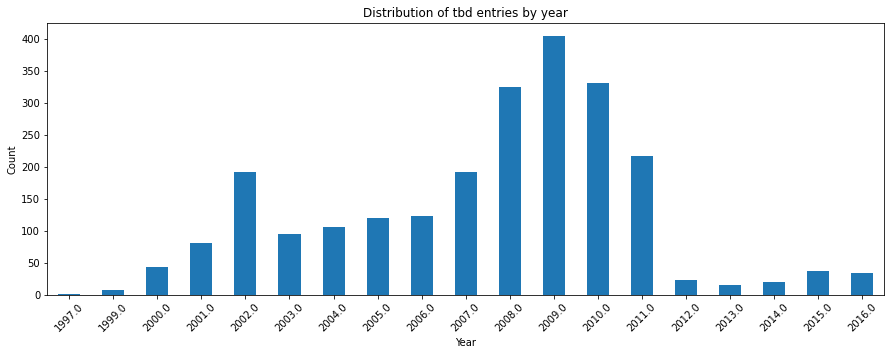

In [13]:
# print a graph representing the distribution of tbd entries by year, using a bar graph
# order the years in ascending order
df_tbd_analysis['year_of_release'].value_counts().sort_index().plot(kind='bar', figsize=(15, 5))
plt.title('Distribution of tbd entries by year')
plt.xlabel('Year')
plt.xticks(rotation=45)
plt.ylabel('Count')


### What to do with  TBT in user scores ? <br>
(To Be Determined)<br>
As can be seen in the above graph- <br>
For some reason, many of the users scores listed as TBT occur before 2012  <br>
However these scores data back as far as 1997. <br>
We can safely assumee if the data has not been determiend by now, it will not be determined any time soon. <br>
We will treate the TBT scores the same as missing data <br>


In [14]:
# Replace tbd with NaN
df_games['user_score'] = df_games['user_score'].replace('tbd', np.nan)


In [15]:
df_games.head()

name platform  year_of_release         genre  na_sales  \
0                Wii Sports      Wii           2006.0        Sports     41.36   
1         Super Mario Bros.      NES           1985.0      Platform     29.08   
2            Mario Kart Wii      Wii           2008.0        Racing     15.68   
3         Wii Sports Resort      Wii           2009.0        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing     11.27   

   eu_sales  jp_sales  other_sales  critic_score user_score rating  esrb_num  
0     28.96      3.77         8.45          76.0          8      E         2  
1      3.58      6.81         0.77           NaN        NaN     NA         0  
2     12.76      3.79         3.29          82.0        8.3      E         2  
3     10.93      3.28         2.95          80.0          8      E         2  
4      8.89     10.22         1.00           NaN        NaN     NA         0

In [16]:
# move all of the rows with missing values to a new dataframe for further analysis
df_games_missing = df_games[df_games.isna().any(axis=1)]
df_games_missing.head()

name platform  year_of_release         genre  \
1          Super Mario Bros.      NES           1985.0      Platform   
4   Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing   
5                     Tetris       GB           1989.0        Puzzle   
9                  Duck Hunt      NES           1984.0       Shooter   
10                Nintendogs       DS           2005.0    Simulation   

    na_sales  eu_sales  jp_sales  other_sales  critic_score user_score rating  \
1      29.08      3.58      6.81         0.77           NaN        NaN     NA   
4      11.27      8.89     10.22         1.00           NaN        NaN     NA   
5      23.20      2.26      4.22         0.58           NaN        NaN     NA   
9      26.93      0.63      0.28         0.47           NaN        NaN     NA   
10      9.05     10.95      1.93         2.74           NaN        NaN     NA   

    esrb_num  
1          0  
4          0  
5          0  
9          0  
10         0

In [17]:
# Can any of the rows with missing data be filled in by games with the same name?
df_games_missing['name'].value_counts()




The Amazing Spider-Man 2 (2014)             7
LEGO Harry Potter: Years 5-7                7
FIFA 12                                     7
The Amazing Spider-Man (Console Version)    6
FIFA Soccer 07                              6
                                           ..
Hyakka Yakou                                1
Donkey Kong Jungle Climber                  1
Small Soldiers                              1
Taiko no Tatsujin DS: Touch de Dokodon!     1
Looney Tunes Racing                         1
Name: name, Length: 8012, dtype: int64

In [18]:
# Show all the listings for fifa 12
df_games[df_games['name'] == 'FIFA 12']

name platform  year_of_release   genre  na_sales  eu_sales  \
122    FIFA 12      PS3           2011.0  Sports      0.84      4.30   
278    FIFA 12     X360           2011.0  Sports      0.84      2.78   
2677   FIFA 12      Wii           2011.0  Sports      0.15      0.50   
3843   FIFA 12      PSP           2011.0  Sports      0.12      0.25   
4191   FIFA 12       PC           2011.0  Sports      0.04      0.33   
4902   FIFA 12      3DS           2011.0  Sports      0.08      0.26   
11237  FIFA 12      PS2           2011.0  Sports      0.00      0.02   

       jp_sales  other_sales  critic_score user_score rating  esrb_num  
122        0.11         1.39           NaN        NaN     NA         0  
278        0.02         0.53           NaN        NaN     NA         0  
2677       0.00         0.11           NaN        NaN     NA         0  
3843       0.02         0.13           NaN        NaN     NA         0  
4191       0.00         0.10           NaN        NaN     NA         0  
4902       0.00         0.05           NaN        NaN     NA         0  
11237      0.00         0.06           NaN        NaN     NA         0

In [19]:
# Show all the rows with missing year_of_release data
df_games_missing[df_games_missing['year_of_release'].isna()]
df_games_missing_year = df_games_missing[df_games_missing['year_of_release'].isna()]

In [20]:
# in df_games_missing_year, show all the rows where the name column is a duplicate
df_games_missing_year[df_games_missing_year['name'].duplicated(keep=False)]

name platform  year_of_release  \
456           LEGO Batman: The Videogame      Wii              NaN   
627                            Rock Band     X360              NaN   
805                            Rock Band      Wii              NaN   
1142                           Rock Band      PS3              NaN   
1538          LEGO Batman: The Videogame      PSP              NaN   
...                                  ...      ...              ...   
15754                       Virtua Quest      PS2              NaN   
15953  PDC World Championship Darts 2008       DS              NaN   
16180  WRC: FIA World Rally Championship       PC              NaN   
16373  PDC World Championship Darts 2008      PSP              NaN   
16522                       Virtua Quest       GC              NaN   

              genre  na_sales  eu_sales  jp_sales  other_sales  critic_score  \
456          Action      1.80      0.97       0.0         0.29          74.0   
627            Misc      1.93      0.33       0.0         0.21          92.0   
805            Misc      1.33      0.56       0.0         0.20          80.0   
1142           Misc      0.99      0.41       0.0         0.22          92.0   
1538         Action      0.57      0.44       0.0         0.27          73.0   
...             ...       ...       ...       ...          ...           ...   
15754  Role-Playing      0.01      0.01       0.0         0.00          53.0   
15953        Sports      0.01      0.00       0.0         0.00           NaN   
16180        Racing      0.00      0.01       0.0         0.00          65.0   
16373        Sports      0.01      0.00       0.0         0.00          43.0   
16522  Role-Playing      0.01      0.00       0.0         0.00          55.0   

      user_score rating  esrb_num  
456          7.9   E10+         3  
627          8.2      T         4  
805          6.3      T         4  
1142         8.4      T         4  
1538         7.4   E10+         3  
...          ...    ...       ...  
15754        7.6      T         4  
15953        NaN     NA         0  
16180        NaN     RP         7  
16373        NaN   E10+         3  
16522        5.5      T         4  

[62 rows x 12 columns]

In [21]:
# Create a backup dataframe
df_games_copy = df_games.copy()

In [22]:
# write a function that will pass over the rows in df_games and fill in the missing year_of_release data with the year_of_release data from the row with the same name
def fill_year_of_release(row):
    if pd.isna(row['year_of_release']):
        return df_games[df_games['name'] == row['name']]['year_of_release'].values[0]
    else:
        return row['year_of_release']

# apply the function to the df_gamesdataframe
df_games['year_of_release'] = df_games.apply(fill_year_of_release, axis=1)

# show the rows with missing year_of_release data
df_games[df_games['year_of_release'].isna()]






name platform  year_of_release  \
183                    Madden NFL 2004      PS2              NaN   
377                   FIFA Soccer 2004      PS2              NaN   
475         wwe Smackdown vs. Raw 2006      PS2              NaN   
609                     Space Invaders     2600              NaN   
627                          Rock Band     X360              NaN   
...                                ...      ...              ...   
16277  Homeworld Remastered Collection       PC              NaN   
16288                           Shorts       DS              NaN   
16348     Agarest Senki: Re-appearance      PS3              NaN   
16458      Hakuouki: Shinsengumi Kitan      PS3              NaN   
16522                     Virtua Quest       GC              NaN   

              genre  na_sales  eu_sales  jp_sales  other_sales  critic_score  \
183          Sports      4.26      0.26      0.01         0.71          94.0   
377          Sports      0.59      2.36      0.04         0.51          84.0   
475        Fighting      1.57      1.02      0.00         0.41           NaN   
609         Shooter      2.36      0.14      0.00         0.03           NaN   
627            Misc      1.93      0.33      0.00         0.21          92.0   
...             ...       ...       ...       ...          ...           ...   
16277      Strategy      0.00      0.01      0.00         0.00          86.0   
16288      Platform      0.01      0.00      0.00         0.00           NaN   
16348  Role-Playing      0.00      0.00      0.01         0.00           NaN   
16458     Adventure      0.01      0.00      0.00         0.00           NaN   
16522  Role-Playing      0.01      0.00      0.00         0.00          55.0   

      user_score rating  esrb_num  
183          8.5      E         2  
377          6.4      E         2  
475          NaN     NA         0  
609          NaN     NA         0  
627          8.2      T         4  
...          ...    ...       ...  
16277        8.2   E10+         3  
16288        NaN   E10+         3  
16348        NaN     NA         0  
16458        NaN     NA         0  
16522        5.5      T         4  

[191 rows x 12 columns]

In [23]:
# count the number of missing values in the year_of_release column
df_games['year_of_release'].isna().sum()

191

In [24]:
# count the number of missing values in the year_of_release column in df_games_copy
df_games_copy['year_of_release'].isna().sum()

269

### Well...
Our first attempt to repair the data sought to use the same games published on different platforms as reference data for our missing data. <br>
This did not work, <br>
In summary, our function failed to repair even a single row of data. <br)>
Frustrating - this seems to be because games that are missing release year, are missing the data accoss all entries for each of the relevant platforms. <
<br>
Our second attempt is to replace all of the <NA> data in the year_of_release column with 1800. <br>
Since electricity was not invented until the year 1879, it should be clear that this is fill data, and we can make changes later if we need too.

### Update: The Year 1800 !<br>
I've had a few more iterations with the data <br>
and the 1800 fill in year we implemented earlier is continuing to be a problem. <br>
<br>
Drafting a new stratedgy, leaving the preveous attempts as part of "showing our work", and as reference material for future learners.



### New and Final Stratedgy: <br>
Determine the median year for each platform, and replace the game release year with that info. <br>
Most platforms are only around for a few years each, so at most we'll only be a few years off. <br>

In [25]:
# Create a backup dataframe df_games_1800 branch
df_games_1800 = df_games.copy()

In [26]:
# replace the missing values in the year_of_release column in df_games with 1800
df_games_1800['year_of_release'] = df_games['year_of_release'].fillna(1800)

# count the number of missing values in the year_of_release column in df_games
df_games_1800['year_of_release'].isna().sum()

0

In [27]:
# Determine the median year_of_release for each platform
df_games.groupby('platform')['year_of_release'].median()

# replace the missing values in the year_of_release column in df_games with the median year_of_release for each platform
df_games['year_of_release'] = df_games.groupby('platform')['year_of_release'].transform(lambda x: x.fillna(x.median()))

# count the number of missing values in the year_of_release column in df_games
df_games['year_of_release'].isna().sum()


0

In [28]:
# Convert the data to the required types.

# Convert years of release to date time
# df_games['year_of_release'] = pd.to_datetime(df_games['year_of_release'], format='%Y')

df_games['year_of_release'] = df_games['year_of_release'].astype('Int64')
df_games['critic_score'] = df_games['critic_score'].astype('Int64')
df_games['user_score'] = df_games['user_score'].astype('float64')

# df_games.head(-5)



### Describe the columns where the data types have been changed and why. <br>
<br>
The year_of_release column has been changed to the Int64 data type because it is a whole number. <br>
<br>
The critic_score and user_score columns have been changed to the float64 data type because they are decimal numbers. <br> 
<br>
We considered converting year_of_release to datetime, however this artificually inserted a month and day, which was missleading. <br>

In [29]:
# Check for missing values 
df_games.isnull().sum()

name                  2
platform              0
year_of_release       0
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating                0
esrb_num              0
dtype: int64

In [30]:
# Calculate the percentage of missing values for each column
critic_score_missing = df_games['critic_score'].isna().mean() * 100
user_score_missing = df_games['user_score'].isna().mean() * 100
rating_missing = df_games['rating'].isna().mean() * 100

# Print the results
print(f'Percentage of critic_score missing: {critic_score_missing:.2f}%')
print(f'Percentage of user_score missing: {user_score_missing:.2f}%')
print(f'Percentage of rating missing: {rating_missing:.2f}%')


Percentage of critic_score missing: 51.32%
Percentage of user_score missing: 54.59%
Percentage of rating missing: 0.00%


In [31]:
# Reviewer's code

df_games.isna().mean()*100

name                0.011965
platform            0.000000
year_of_release     0.000000
genre               0.011965
na_sales            0.000000
eu_sales            0.000000
jp_sales            0.000000
other_sales         0.000000
critic_score       51.319174
user_score         54.591684
rating              0.000000
esrb_num            0.000000
dtype: float64

# % of data missing
year of release - 269 missing values - 2.5% of the data (before the fix we implemented preveously) <br>
critic score - 8487 missing values - 51.4% of the data <br>
user score - 9016 missing values - 54.57% of the data <br>
rating - 6696 missing values - 40.5% of the data <br>

In [32]:
# prints the rows that have missing values in the name columns
df_games[df_games['name'].isna()]

name platform  year_of_release genre  na_sales  eu_sales  jp_sales  \
659    NaN      GEN             1993   NaN      1.78      0.53      0.00   
14244  NaN      GEN             1993   NaN      0.00      0.00      0.03   

       other_sales  critic_score  user_score rating  esrb_num  
659           0.08          <NA>         NaN     NA         0  
14244         0.00          <NA>         NaN     NA         0

In [33]:
# Those two rows of data are garbage, let's drop them.
# Drop the rows with missing values in the name or genre columns
df_games = df_games.dropna(subset=['name', 'genre'])

In [34]:
# Print the date range of the data
print(df_games['year_of_release'].min())
print(df_games['year_of_release'].max())

# print how many years the data spans with text
print('The data spans', df_games['year_of_release'].max() - df_games['year_of_release'].min(), 'years')

# 36 years of data


1980
2016
The data spans 36 years


In [35]:
# What percentage of rows are missing at least one value?
print(df_games.isna().any(axis=1).sum() / df_games.shape[0] * 100)

58.01471908095495


### Missing Values Summary:
I don't yet know what to do with the missing values in critic score, user score, or rating. <br>
<br>
<FONT COLOR= #ff0000><b> !!! Any changes we make will be effect 58% of the data !!! <br></b> </font>
<br>
The critics scores are probably that way because not every game gets a critical review - missing over 50% of the data isn't great.
Perhaps the reason why the data is missing will become evident once we start exploring it.
We replaced missing year of release data by filling the median year of release for the corisponding platform. This effected 2.5% of the data, and can be referenced in the df_games_1800 dataframe for further analysis if need be.

In [36]:
# List each rating and the number of games with that rating
df_games['rating'].value_counts()

NA      6764
E       3990
T       2961
M       1563
E10+    1420
EC         8
RP         3
K-A        3
AO         1
Name: rating, dtype: int64

In [37]:
# Calculate the total sales (the sum of sales in all regions) for each game and put these values in a separate column.
df_games['total_sales'] = df_games['na_sales'] + df_games['eu_sales'] + df_games['jp_sales'] + df_games['other_sales']

# Show the top 10 games by total sales
df_games.sort_values(by='total_sales', ascending=False).head(-10)

name platform  year_of_release  \
0                                        Wii Sports      Wii             2006   
1                                 Super Mario Bros.      NES             1985   
2                                    Mario Kart Wii      Wii             2008   
3                                 Wii Sports Resort      Wii             2009   
4                          Pokemon Red/Pokemon Blue       GB             1996   
...                                             ...      ...              ...   
16171            Infinite Stratos 2: Love and Purge      PSV             2015   
16172                               Honda ATV Fever       DS             2010   
16173  Umihara Kawase Jun: Second Edition Kanzenban       DS             2009   
16174                              50 Classic Games      3DS             2012   
16175                                   Psycho-Pass     XOne             2014   

              genre  na_sales  eu_sales  jp_sales  other_sales  critic_score  \
0            Sports     41.36     28.96      3.77         8.45            76   
1          Platform     29.08      3.58      6.81         0.77          <NA>   
2            Racing     15.68     12.76      3.79         3.29            82   
3            Sports     15.61     10.93      3.28         2.95            80   
4      Role-Playing     11.27      8.89     10.22         1.00          <NA>   
...             ...       ...       ...       ...          ...           ...   
16171        Action      0.00      0.00      0.01         0.00          <NA>   
16172        Racing      0.01      0.00      0.00         0.00          <NA>   
16173        Puzzle      0.00      0.00      0.01         0.00          <NA>   
16174          Misc      0.00      0.01      0.00         0.00          <NA>   
16175     Adventure      0.00      0.00      0.01         0.00          <NA>   

       user_score rating  esrb_num  total_sales  
0             8.0      E         2        82.54  
1             NaN     NA         0        40.24  
2             8.3      E         2        35.52  
3             8.0      E         2        32.77  
4             NaN     NA         0        31.38  
...           ...    ...       ...          ...  
16171         NaN     NA         0         0.01  
16172         NaN      E         2         0.01  
16173         NaN     NA         0         0.01  
16174         NaN     NA         0         0.01  
16175         NaN     NA         0         0.01  

[16703 rows x 13 columns]

In [38]:
df_games['total_sales_Review'] = df_games[['na_sales','eu_sales','jp_sales','other_sales']].sum(axis=1)

In [39]:
# Check for duplicates
df_games.duplicated().sum()

0

# Step 3. Explore and Analyze the data <br>
Once the data has been prepared and cleaned, the next step in the project is to perform analysis on the data to identify patterns and relationships that can help predict the success of a video game. This can involve a number of different techniques, such as regression analysis, correlation analysis, and clustering.

The data can be examined to see how many games were released in different years, and whether the data for each period is significant. This can help to identify any trends or patterns in game releases over time, and can also help to determine whether the data is sufficient to make reliable predictions for future years.

Next, the data can be used to examine how sales varied from platform to platform. This can involve looking at the total sales for each platform, and identifying the platforms with the greatest sales. A distribution of sales data can then be built for each year, to identify any trends or patterns in platform popularity over time. This can also help to identify platforms that were once popular but now have zero sales, and can provide insight into how long it typically takes for new platforms to emerge and old ones to fade.

Based on this analysis, it should be possible to determine the period for which data should be used to make predictions for 2017. This period should be chosen carefully to ensure that the data is relevant and sufficient for the analysis, and to maximize the accuracy of the predictions.

Once the relevant data has been identified, it can be used to analyze the sales of games on different platforms. This can involve identifying the leading platforms in terms of sales, and examining any trends or patterns in platform popularity over time. By selecting several potentially profitable platforms, it should be possible to focus the analysis on the platforms with the greatest potential for success.

A box plot can then be used to visualize the global sales of all games, broken down by platform. This can help to identify any significant differences in sales between platforms, and can also provide insight into the average sales for each platform. By examining these differences, it should be possible to draw conclusions about the most profitable platforms, and to identify opportunities for advertising and marketing campaigns.

Additionally, the relationship between user and professional reviews and game sales can be examined for one popular platform. A scatter plot can be used to visualize this relationship, and the correlation between reviews and sales can be calculated. This can help to identify any patterns or trends in the data, and can provide insight into the impact of reviews on game sales.

Finally, the sales of the same games on other platforms can be compared, keeping the conclusions from the previous analysis in mind. This can provide additional insight into the relative success of different platforms, and can help to identify any opportunities for cross-platform marketing or advertising campaigns.

Overall, the goal of this step is to use data analysis techniques to identify patterns and relationships in the data that can help predict the success of a video game. By applying these techniques to the data, it should be possible to identify the most profitable platforms, genres, and other factors that can impact the success of a game.

In [40]:
# How many different platforms are there?
df_games['platform'].nunique()

# 31 platforms

31

In [41]:
# There is a column with the names of the games. Let's see how many unique games there are
df_games['name'].nunique()

# There are 11559 unique games. 


11559

In [42]:
# Let's see how many games are repeated
df_games['name'].value_counts()

# It looks like games are repeated becuse they show up separetlly for different platforms.


Need for Speed: Most Wanted    12
LEGO Marvel Super Heroes        9
Madden NFL 07                   9
FIFA 14                         9
Ratatouille                     9
                               ..
Jewel Match                     1
History Great Empires: Rome     1
Star Fox                        1
Demon Gaze 2                    1
Looney Tunes Racing             1
Name: name, Length: 11559, dtype: int64

In [43]:
# Let's see how many games are repeated for different platforms
df_games['name'].value_counts().value_counts()

# Need for Speed: Most Wanted is available on 12 of the 31 platforms

1     8754
2     1522
3      716
4      281
5      149
6       87
7       32
8       13
9        4
12       1
Name: name, dtype: int64

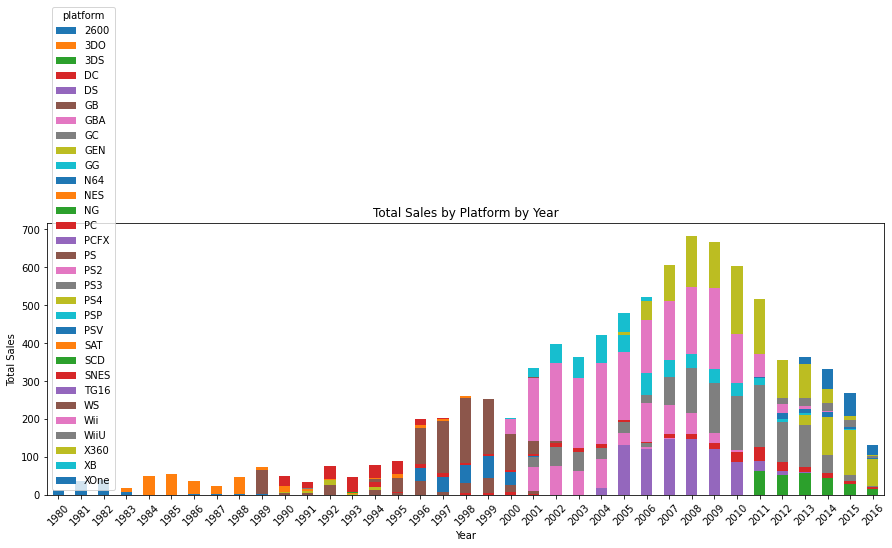

In [44]:
# stack platform sales by year
df_games.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum').plot(kind='bar', figsize=(15, 5), stacked=True)
# Title
plt.title('Total Sales by Platform by Year')
# x label
plt.xlabel('Year')
# rotate the x axis labels
plt.xticks(rotation=45)
# y label
plt.ylabel('Total Sales')
plt.show()


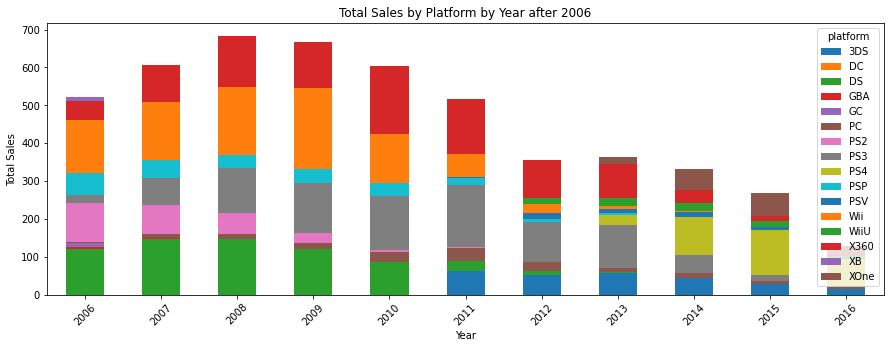

In [45]:
# stack platform sales by year after 2006
df_games[df_games['year_of_release'] >= 2006].pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum').plot(kind='bar', figsize=(15, 5), stacked=True)
# Title
plt.title('Total Sales by Platform by Year after 2006')
# x label
plt.xlabel('Year')
# rotate the x axis labels
plt.xticks(rotation=45)
# y label
plt.ylabel('Total Sales')
plt.show()

These are two of my favorite graphs in this analysis. They shows how the vareous platforms contributed to total sales each year. <br>
The second graph is limiting the scope to the years following 2006, representing 10 years worth of data. <br>
It might be fun sometime to color cordinate the graph based on the company that realeased the platforms, grouping all Nintendo platforms together under a single color. <br>
<br> Another time perhaps, perfection is the enemy of progress.

In [46]:
# Which platforms have not had any sales in the last 10 years?
df_games[df_games['year_of_release'] >= 2006]['platform'].value_counts().sort_index()


3DS      519
DC         2
DS      2009
GBA       46
GC        45
PC       792
PS2      807
PS3     1330
PS4      392
PSP     1099
PSV      430
Wii     1320
WiiU     147
X360    1242
XB        66
XOne     247
Name: platform, dtype: int64

### The original play station was released in 1994, that marked a new era for video games.

In [47]:
# What platform had the most sales in 1996? 
# sort by platform then sum total sales
df_games[df_games['year_of_release'] == 1996].groupby('platform')['total_sales'].sum().sort_values(ascending=False)

platform
PS      94.70
GB      36.03
N64     34.10
SNES    15.92
PC      10.58
SAT      7.69
NG       0.10
PCFX     0.03
Name: total_sales, dtype: float64

Play Station at nearly trippled the sales of the next highest grossing platform, which was the mobile platform Game Boy by Nintendo.

In [48]:
# lets create a dataframe representing the platforms that are still active

# Create df_active_platforms and include only the platforms that had sales in 2015 and 2016
df_active_platforms = df_games[df_games['platform'].isin(df_games[df_games['year_of_release'] >= 2015]['platform'].value_counts().sort_index().index)]

In [49]:
# show the min and max range for year of release for the active platforms
print(df_active_platforms['year_of_release'].min())
print(df_active_platforms['year_of_release'].max())

# show all the platforms that are still active
df_active_platforms['platform'].value_counts().sort_index()

1985
2016


3DS      520
PC       974
PS3     1331
PS4      392
PSP     1209
PSV      430
Wii     1320
WiiU     147
X360    1262
XOne     247
Name: platform, dtype: int64

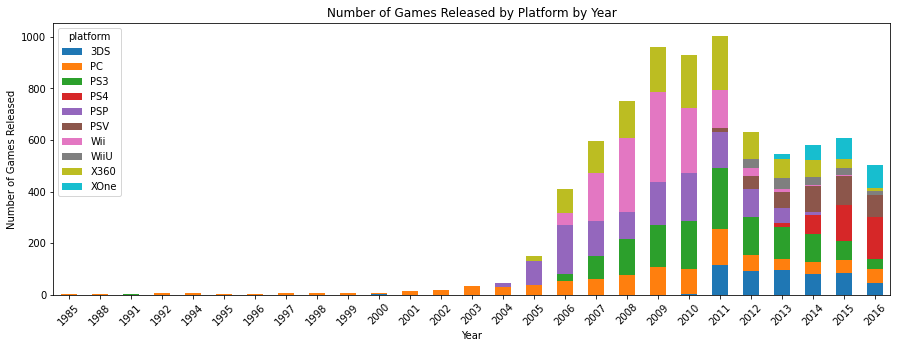

In [50]:
# plot the number of games that each active platform has released by year
df_active_platforms.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='count').plot(kind='bar', figsize=(15, 5), stacked=True)
# Title
plt.title('Number of Games Released by Platform by Year')
# x label
plt.xlabel('Year')
# rotate the x axis labels
plt.xticks(rotation=45)
# y label
plt.ylabel('Number of Games Released')
plt.show()

It looks like PC Games are Dramatically extending our "active" platforms dataframe. <br>
PC Games as a platform continue to evolve year over year, <br>
however one would be hard pressed to conclude that the PC games of today are the same system as the PC games of 1985, <br>
at least as we define a gaming system across the rest of our dataset.

In [51]:
# What active platforms had sales in 2003 or earlier?
df_active_platforms[df_active_platforms['year_of_release'] <= 2003]['platform'].value_counts().sort_index()


3DS      1
PC     115
PS3      1
Name: platform, dtype: int64

In [52]:
# How many sales did the xbox 360 have in 2005?
df_active_platforms[(df_active_platforms['platform'] == 'X360') & (df_active_platforms['year_of_release'] == 2005)]['total_sales'].sum()

9.1

### Long live the PC Gamer
Our active platform dataset was being scewed by PC Games <br>
A Platform Category that goes back to 1985, even though there are many technological and brand itterations over those years <br>
They are all still lumpted together as "PC GAMES" <br>
<br>
Lets start our active dataset in 2005, with the launch of the xbox 360, <br>
Arguably the begiining of the modern era of video games, and it puts a reasonable boarder of 10 years on our active platforms data set.


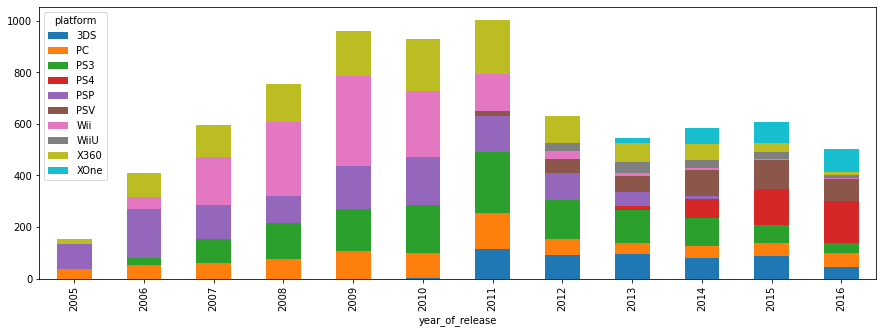

In [53]:
# in active platforms, drop rows with year of release before 2005
df_active_platforms = df_active_platforms[df_active_platforms['year_of_release'] >= 2005]

# plot the number of games that each active platform has released by year
df_active_platforms.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='count').plot(kind='bar', figsize=(15, 5), stacked=True)
plt.show()

In [54]:
# How long does it generally take for new platforms to appear and old ones to fade?
# Create a dataframe with platform as the index, and a columb for it's first year of release, and another column for it's last year of release
df_platforms = pd.DataFrame(df_games.groupby('platform')['year_of_release'].min())
df_platforms['last_year'] = df_games.groupby('platform')['year_of_release'].max()
df_platforms['years_active'] = df_platforms['last_year'] - df_platforms['year_of_release']
df_platforms.sort_values(by='years_active', ascending=False)

# organize the data by last year of release
df_platforms.sort_values(by='last_year', ascending=False)




year_of_release  last_year  years_active
platform                                          
XOne                 2013       2016             3
PS3                  1991       2016            25
PS4                  2013       2016             3
PC                   1985       2016            31
PSV                  2011       2016             5
Wii                  2006       2016            10
WiiU                 2012       2016             4
X360                 2005       2016            11
3DS                  2000       2016            16
PSP                  2004       2015            11
DS                   1985       2013            28
PS2                  1998       2011            13
XB                   2000       2008             8
DC                   1998       2008            10
GC                   2001       2007             6
GBA                  2000       2007             7
N64                  1996       2004             8
PS                   1994       2003             9
WS                   1999       2001             2
GB                   1988       2001            13
SAT                  1994       1999             5
SNES                 1990       1999             9
PCFX                 1996       1996             0
NG                   1993       1996             3
3DO                  1994       1995             1
TG16                 1995       1995             0
SCD                  1993       1994             1
NES                  1983       1994            11
GEN                  1990       1994             4
GG                   1992       1992             0
2600                 1980       1989             9

In [55]:
#The plotly.figure_factory.create_gantt function expects the data to be in a specific format, with columns named "Task", "Start", and "Finish". 

# Rename the columns of df_platforms to match the expected format. 
df_platforms = df_platforms.rename(columns={'year_of_release': 'Start', 'last_year': 'Finish'})


In [56]:
# setting up the columbs to be used by plotty in the gantt chart
df_platforms['Task'] = df_platforms.index


In [57]:
#how many uique platforms are there?
df_platforms['Task'].nunique()

# 31 unique platforms

31

In [58]:
# Create a list of 31 colors for the Gantt chart
colors = [
    '#FFCCCC', '#FF9999', '#FF6666', '#FF3333', '#FF0000',          '#CC0000', '#990000', '#660000', '#330000', '#000000',          '#CCCCFF', '#9999FF', '#6666FF', '#3333FF', '#0000FF',          '#0000CC', '#000099', '#000066', '#000033', '#CCCCCC',          '#9999CC', '#6666CC', '#3333CC', '#0000CC', '#CCCC99',          '#999999', '#666699', '#333399', '#999966', '#666666',          '#333366', '#99CCCC'
    ]


In [59]:
# Create the Gantt chart using plotly
fig = ff.create_gantt(df_platforms, index_col='Task', colors=colors, show_colorbar=True, group_tasks=True,
                      title='Platform Lifespans')
plotly.offline.iplot(fig)



My first attempt at a gannt chart in python. It seemed like the best way to display platform lifecycles. <br>
In the future, I'd like to work with the colors to better communicate the information <br>
And my preference would be for the data to be organized by "last_year" or similar, but I couldn't quite get that to work out without re-indexing, which introduced new problems. <br>
<br>
Still, I'm pleased with the concept, and I think it shows merrit for further investigation. <br>
Will continue the analysis in the next frame. <br>

How long does it generally take for new platforms to appear and old ones to fade?

In [60]:
# What is the average lifespan of a platform?
# Round the results to the nearest year
# print the results in a sentence
print('The average lifespan of a platform is {} years.'.format(round(df_platforms['years_active'].mean())))

# The average lifespan of a platform is 8-9 years.

The average lifespan of a platform is 9 years.


The average lifespan of a platform is 8-9 years.

In [61]:
# How often does a new platform appear?
# calculate the average number of years between the first year of release of each platform using df_platforms

df_platforms['years_between'] = df_platforms['Start'].diff()
print('The average number of years between the first year of release of each platform is {} years.'.format(round(df_platforms['years_between'].mean())))

# df_platforms['years_between'].head(-5)

The average number of years between the first year of release of each platform is 1 years.


On average, a new platform every year. Could that be right?
31 platforms over 26 years, with a rounding error. Ok, close enough.

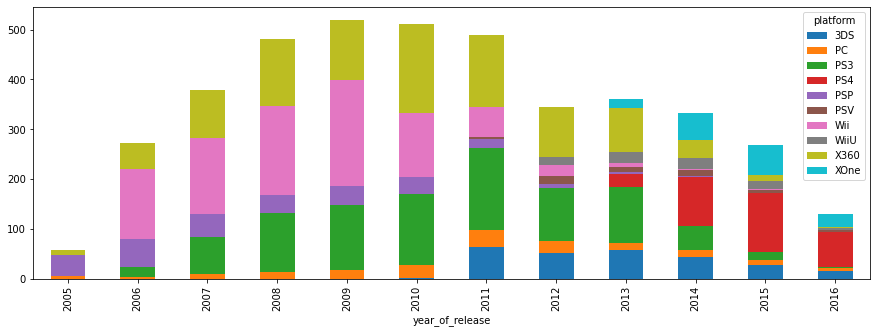

In [62]:
# plot total sales of each active platform by released by year
df_active_platforms.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum').plot(kind='bar', figsize=(15, 5), stacked=True)
plt.show()

in 2019, we see the highest total sales of any year in our sample. <br>
PC Gaming is an ever present minority platform. <br>
Wii Sales peaked in 2009, and the PS3 platform is showing slow year over year market growth at this point. <br>
In contrast, by 2016, the end of our dataset - we see almost(?) complete turnover in platforms, with the PS4 taking over the bulk of the market share and consuming the companies preverous model - the PS3. Simmilarly Microsoft's XOne displaced the X360.

In [63]:
# How did total sales vary from platform to platform.
df_active_platforms.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=True)



total_sales
platform             
PSV             54.07
WiiU            82.19
XOne           159.32
PC             171.50
3DS            258.98
PSP            286.99
PS4            314.14
Wii            907.51
PS3            939.17
X360           971.42

Which platform had the highest total sales overall?

In [64]:
# Which platform had the highest total sales overall?
df_games.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False).head(1)

# Interesting! 
# It's not a current platform. 
# It's the PS2 !!!

total_sales
platform             
PS2           1255.77

Interesting! <br>
It's not a current platform. <br> 
It's the PS2 !!! <br>

Which active (current) platform has the highest total sales?

In [65]:
# Which active (current) platform has the highest total sales?
df_active_platforms.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False).head(1)

# X360 longevity in the market giives it an advantage among the active platforms - 971.42 million in sales


total_sales
platform             
X360           971.42

X360 longevity in the market giives it an advantage among the active platforms - 971.42 million in sales

In [66]:
#  Build a distribution based on data for X360 total sales for each year.  
#  How many games were released for X360 each year?
df_active_platforms[df_active_platforms['platform'] == 'X360'].pivot_table(index='year_of_release', values='total_sales', aggfunc='count')

total_sales
year_of_release             
2005                      20
2006                      93
2007                     123
2008                     146
2009                     173
2010                     204
2011                     210
2012                     107
2013                      75
2014                      63
2015                      35
2016                      13

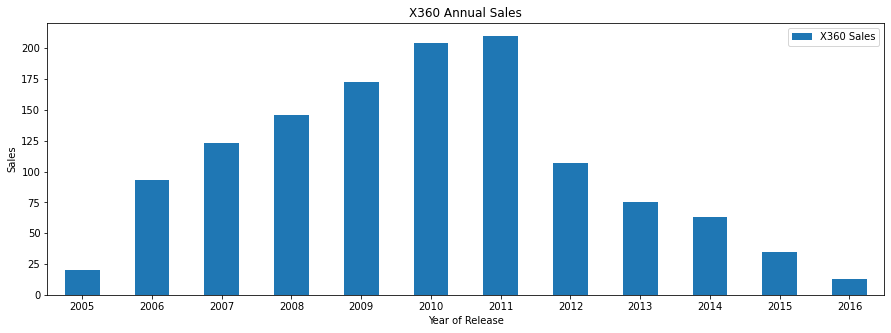

In [67]:
# Graph the distribution
df_active_platforms[df_active_platforms['platform'] == 'X360'].pivot_table(index='year_of_release', values='total_sales', aggfunc='count').plot(kind='bar', figsize=(15, 5))
# tilt the x axis labels to zero degrees
plt.xticks(rotation=0)
# X axis label Year of Release
plt.xlabel('Year of Release')
# Y axis label - Sales
plt.ylabel('Sales')
# Title - X360 Annual Sales
plt.title('X360 Annual Sales')
# Lgend - X360 Sales
plt.legend(['X360 Sales'])
plt.show()




Sales peaked in 2011 for X360

In [68]:
# Top 3 platforms by total sales

# Create a list of the top 3 platforms by total sales
top_3_platforms = list(df_active_platforms.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False).head(3).index)

# print the result in a sentance
print('The top 3 platforms by total sales are: {}'.format(top_3_platforms))

# ['X360', 'PS3', 'Wii']

The top 3 platforms by total sales are: ['X360', 'PS3', 'Wii']


which platforms release games between 1985 and 2015, but NOT in 2016?

In [69]:
# Create a list of platforms that released games between 1985 and 2015, but NOT in 2016
platforms_1985_2015 = list(df_games[(df_games['year_of_release'] >= 1985) & (df_games['year_of_release'] <= 2015) & (df_games['year_of_release'] != 2016)]['platform'].unique())

# display the result
# platforms_1985_2015

In [70]:
# Which platforms have more sales in 2015 than in 2014? (increasing in sales year over year) reference df_active_platforms
df_active_platforms[df_active_platforms['year_of_release'] == 2015].pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False) - df_active_platforms[df_active_platforms['year_of_release'] == 2014].pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False)

# PS4 and XOne are the only platforms that have increased in sales year over year

total_sales
platform             
3DS            -15.98
PC              -4.76
PS3            -30.94
PS4             18.90
PSP             -0.12
PSV             -5.91
Wii             -2.61
WiiU            -5.68
X360           -22.78
XOne             6.07

PS4 and XOne have positive year over year sales

In [71]:
# Which platforms have more sales in 2016 than in 2015? (increasing in sales year over year) reference df_active_platforms
df_active_platforms[df_active_platforms['year_of_release'] == 2016].pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False) - df_active_platforms[df_active_platforms['year_of_release'] == 2015].pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False)



total_sales
platform             
3DS            -12.64
PC              -3.27
PS3            -13.22
PS4            -49.65
PSP               NaN
PSV             -2.00
Wii             -0.96
WiiU           -11.75
X360           -10.44
XOne           -33.99

All year over year sales numbers are negative for 2016,
I was hoping to extrapolate a positive year over year trand, but it looks like the market is shrinking.

In [72]:
# How much did the total market contract between 2014, 2015, and 2016?
df_active_platforms.pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').diff()


total_sales
year_of_release             
2005                     NaN
2006                  214.26
2007                  106.99
2008                  102.39
2009                   39.10
2010                   -7.90
2011                  -23.45
2012                 -143.85
2013                   16.59
2014                  -29.65
2015                  -63.81
2016                 -138.04

In [73]:
# caculate the total market share for each platform for each year
df_active_platforms['market_share'] = df_active_platforms['total_sales'] / df_active_platforms.groupby('year_of_release')['total_sales'].transform('sum')

# # display the results
# df_active_platforms.head()


In [74]:
# sum the market share for each year (unit test)
df_active_platforms.pivot_table(index='year_of_release', values='market_share', aggfunc='sum')

market_share
year_of_release              
2005                      1.0
2006                      1.0
2007                      1.0
2008                      1.0
2009                      1.0
2010                      1.0
2011                      1.0
2012                      1.0
2013                      1.0
2014                      1.0
2015                      1.0
2016                      1.0

<AxesSubplot:xlabel='year_of_release'>

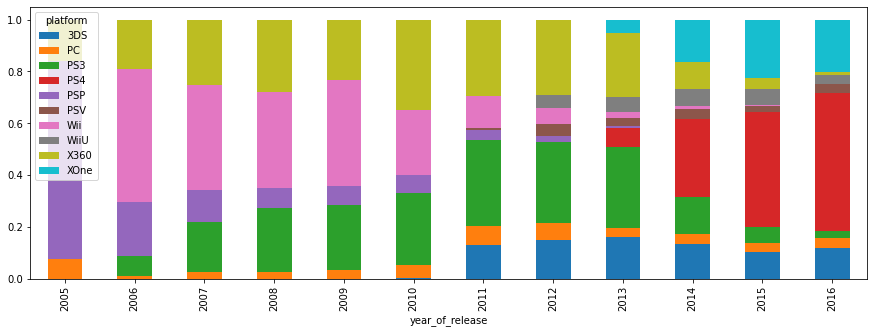

In [75]:
# graph the platforms wtih the highest market share for each year
df_active_platforms.pivot_table(index='year_of_release', columns='platform', values='market_share', aggfunc='sum').plot(kind='bar', figsize=(15, 5), stacked=True)

Promissing platforms for future growth are PS4, 3DS, and XOne.

### Build a prognosis for 2017
And determine what period we will take data for:

In [76]:
# Build a dataframe for all 2013+ data
df_2013 = df_active_platforms[df_active_platforms['year_of_release'] >= 2013]

<AxesSubplot:>

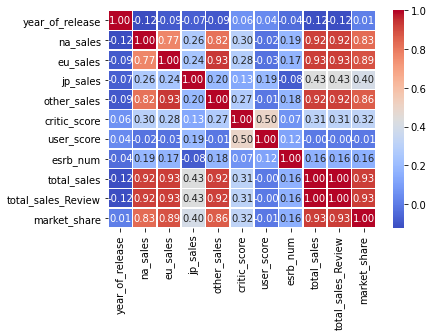

In [77]:
# What column of data is the most important for predicting future sales?
df_2013.corr()['total_sales']

# graph the correlation of each column to total sales using a heatmap
sns.heatmap(df_2013.corr(), annot=True, fmt='.2f', linewidths=.5, cmap='coolwarm')

### Total Sales Correlation
ESRB corrilation with total sales is weak accoss all geographies. <br>
Criticals scores and user scores similarly fail to be strong predictors of total sales. <br>
ESRB does corrilate strongly for North America and EU at .93, Japan less so at .43. <br>

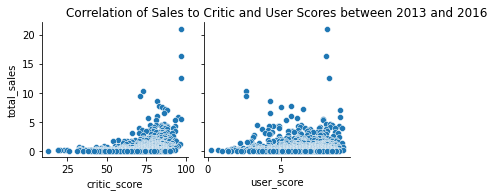

In [78]:
# Graph the correlation of total sales to other columns using a scatter plot. Switch to seaborn since our graphs are getting a bit more complex
sns.pairplot(data=df_2013, kind='scatter', x_vars=['critic_score', 'user_score'] , y_vars=['total_sales'])

# y axis label - Sales
plt.ylabel('Total Sales')
# Title - Correlation of Sales to Other Columns
plt.title('Correlation of Sales to Critic and User Scores between 2013 and 2016')
plt.show()

It's interesting that critic scores corrilate with total sales up to a score of about 85% or so, then fall off. <br>
user scores pile up after a certain point, but the corrilation is relatively flat afterwards. <br>

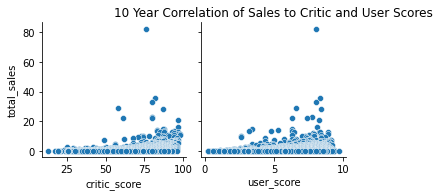

In [79]:
sns.pairplot(data=df_active_platforms, kind='scatter', x_vars=['critic_score', 'user_score'] , y_vars=['total_sales'])

# y axis label - Sales
plt.ylabel('Total Sales')
# Title - Correlation of Sales last 10 years
plt.title('10 Year Correlation of Sales to Critic and User Scores')
plt.show()

Similar for the 10 year data sat.

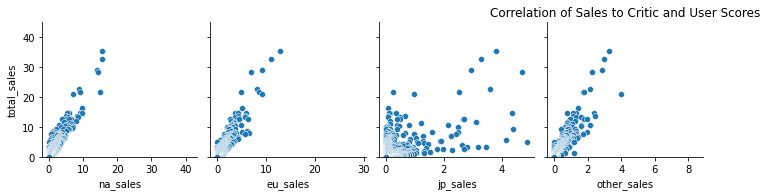

In [80]:
# Graph the correlation of total sales to other columns using a scatter plot. Switch to seaborn since our graphs are getting a bit more complex

g = sns.pairplot(data=df_active_platforms, kind='scatter', x_vars=['na_sales', 'eu_sales', 'jp_sales', 'other_sales'] , y_vars=['total_sales'])
# set the y axis limit to 0 to 45
g.set(ylim=(0, 45))
plt.ylabel('Total Sales in Millions')
plt.title('Correlation of Sales to Critic and User Scores')
plt.show()


### ESRB Rating

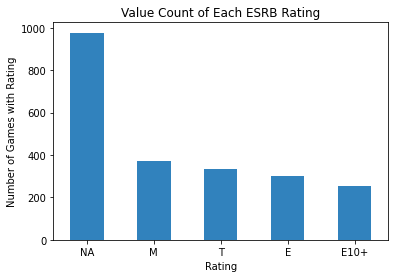

In [81]:
# Graph the Value Counts of each ESRB Rating

df_2013['rating'].value_counts().plot(kind='bar', colormap='tab20c')
plt.title('ESRB Rating')
plt.xlabel('Rating')
# rotate the x-axis labels
plt.xticks(rotation=0)
plt.ylabel('Number of Games with Rating')
# Title
plt.title('Value Count of Each ESRB Rating')

plt.show()

The NA Bar is missing data.<br>
That's a lot of missing data.

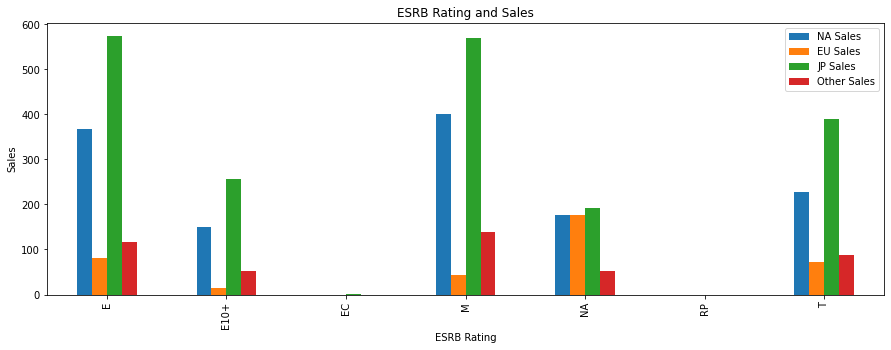

In [82]:
# Graph esrb ratings and sales for each region in one graph

#df_active_platforms.head()
df_active_platforms.pivot_table(index='rating', values=['na_sales', 'eu_sales', 'jp_sales', 'other_sales'], aggfunc='sum').plot(kind='bar', figsize=(15, 5))
# x axis label - key ESRB Rating to numerical value
plt.xlabel('ESRB Rating')

# y axis label - Sales
plt.ylabel('Sales')
# Title - ESRB Rating and Sales
plt.title('ESRB Rating and Sales')
# Lgend - ESRB Rating and Sales
plt.legend(['NA Sales', 'EU Sales', 'JP Sales', 'Other Sales'])
plt.show()

Are there no EC or RP sales in our dataset? <br>
Looks like less than a million in total sales for EC and RP ratings- interesting. <br>


In [83]:
# Show EC and RP sales
df_active_platforms.pivot_table(index='rating', values=['na_sales', 'eu_sales', 'jp_sales', 'other_sales'], aggfunc='sum').loc[['EC', 'RP']]

eu_sales  jp_sales  na_sales  other_sales
rating                                           
EC          0.00       0.0      0.71         0.04
RP          0.08       0.0      0.00         0.01

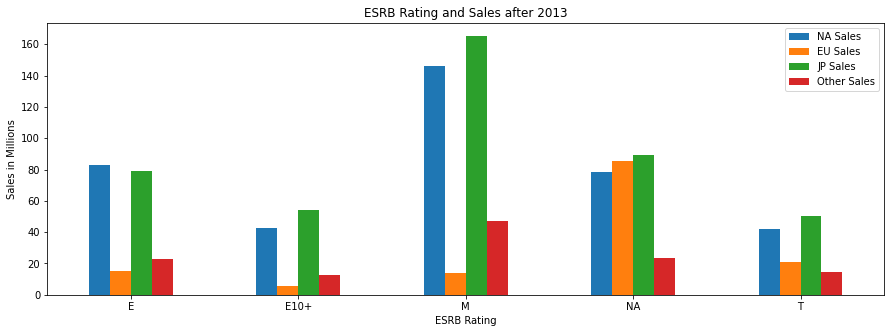

In [84]:
# Graph esrb ratings and sales for each region in one graph using df_2013 dataframe
df_2013.pivot_table(index='rating', values=['na_sales', 'eu_sales', 'jp_sales', 'other_sales'], aggfunc='sum').plot(kind='bar', figsize=(15, 5))
# x axis label - key ESRB Rating
plt.xlabel('ESRB Rating')
# Rotate the x axis labels
plt.xticks(rotation=0)
# title
plt.title('ESRB Rating and Sales after 2013')
# y axis label - Sales in millions
plt.ylabel('Sales in Millions')
# Lgend - ESRB Rating and Sales
plt.legend(['NA Sales', 'EU Sales', 'JP Sales', 'Other Sales'])
plt.show()


It looks like the influence of the E for 'Everyone' Class is deminishing between our 10 year and 3 year dataset. <br>
NA is our non charactized catch all,a nd it's variables are meaningfully clustered. <br>
It's worth noting that this graph is charted against global sales, we'll probably want to dial this in further to region specific sales numbers <br>
The above chart will be helpful in understanding which ratings to invest in for our global marketing budget, but we'll want to dial in specfics for region to region choices. <br>

###  Build a prognosis for 2017

From here on, we'll be working with the active platforms of 2013-2016, which represents platforms that are currently driving in the market.

In [85]:
# Which platforms are leading in sales? - Top 5 platforms in df_2013
df_2013.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False).head(5)



total_sales
platform             
PS4            314.14
PS3            181.43
XOne           159.32
3DS            144.12
X360           136.80

In [86]:
# df_2013.head()

<AxesSubplot:xlabel='year_of_release'>

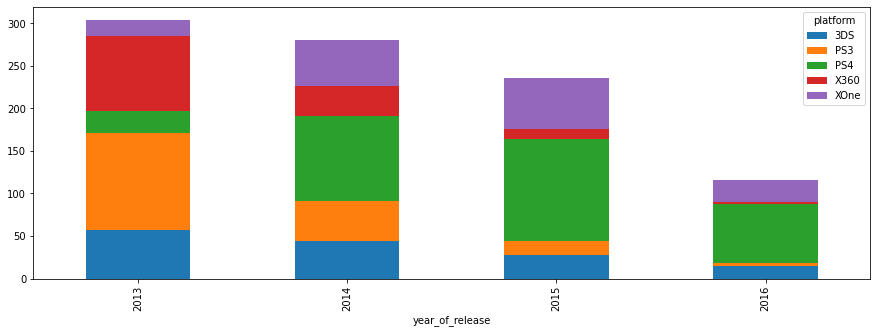

In [87]:
# Graph the top 5 platforms in df_2013, stacked bar chart
# PS3, PS4, XOne, 3DS, X360
df_2013[df_2013['platform'].isin(['PS3', 'PS4', 'XOne', '3DS', 'X360'])].pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum').plot(kind='bar', figsize=(15, 5), stacked=True)



The X360 has pretty much fallen off by 2016, but it's sales are strong enough in 2013 and 2014 to keep it in the top 5 for the whole 4 year dataframe.
PS4 is the leading platform in 2015 and 2016 by a wide margin (>2x)

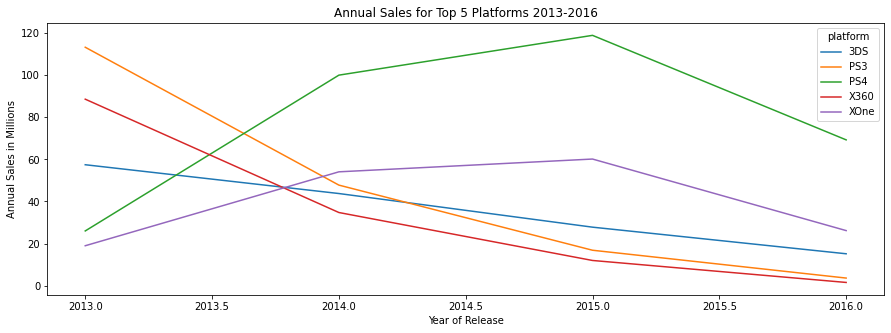

In [88]:
# Which platforms are increasing or decreasing sales year over year in df_2013?
#  Use a line Graph comparing total sales of each platform for df_2013
df_2013[df_2013['platform'].isin(['PS3', 'PS4', 'XOne', '3DS', 'X360'])].pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum').plot(kind='line', figsize=(15, 5))
# The y axis label is Annual Sales
plt.ylabel('Annual Sales in Millions')
# The x axis label is Year of Release
plt.xlabel('Year of Release')
# The title is Annual Sales by Platform
plt.title('Annual Sales for Top 5 Platforms 2013-2016')
plt.show()



It's a bit easier to see the trand of sales rising and falling with this graph.

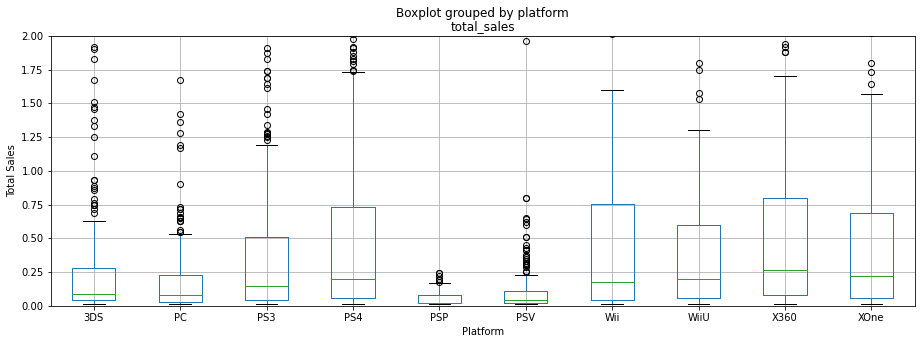

In [89]:
# Build a box plot for the global sales of all games, broken down by platform in df_active_platforms
df_2013.boxplot(column='total_sales', by='platform', figsize=(15, 5))
# ylim to 0 to 2
plt.ylim(0, 2)
# The y axis label is Total Sales
plt.ylabel('Total Sales')
# The x axis label is Platform
plt.xlabel('Platform')
plt.show()

Facinating

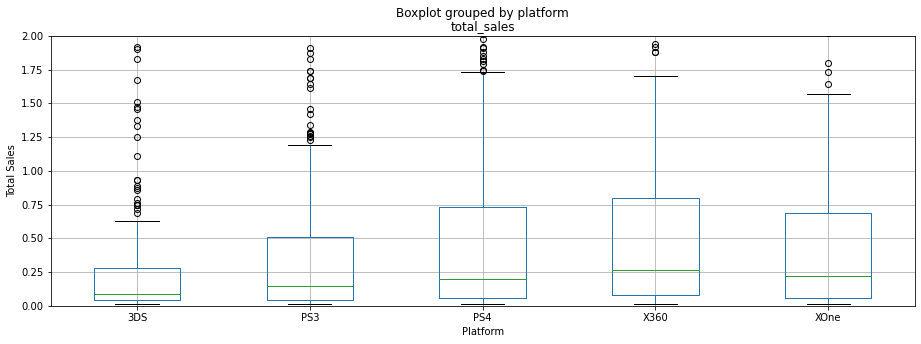

In [90]:
# Build a box plot for the global sales of all games on the top platforms, broken down by platform in df_active_platforms
df_2013[df_2013['platform'].isin(['PS3', 'PS4', 'XOne', '3DS', 'X360'])].boxplot(column='total_sales', by='platform', figsize=(15, 5))
# ylim to 0 to 2
plt.ylim(0, 2)
# The y axis label is Total Sales
plt.ylabel('Total Sales')
# The x axis label is Platform
plt.xlabel('Platform')
plt.show()

The Data we're seein in this chart reflects the top 5 platform sales data we've reviewed earlier, but displayed in a boxplot. <br>


In [91]:
# Drop nan
df_2013_drop = df_2013.dropna(subset=['user_score', 'critic_score'])

#check for null values
# df_2013_drop.isnull().sum()

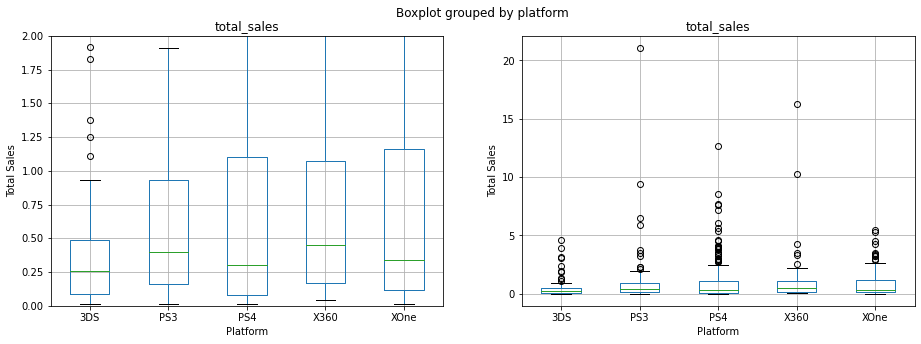

In [92]:
# import matplotlib.pyplot as plt

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Build the first boxplot and set the y-axis limits
df_2013_drop[df_2013_drop['platform'].isin(['PS3', 'PS4', 'XOne', '3DS', 'X360'])].boxplot(column='total_sales', by='platform', ax=ax1)
ax1.set_ylim(0, 2)
ax1.set_ylabel('Total Sales')
ax1.set_xlabel('Platform')

# Build the second boxplot
df_2013_drop[df_2013_drop['platform'].isin(['PS3', 'PS4', 'XOne', '3DS', 'X360'])].boxplot(column='total_sales', by='platform', ax=ax2)
ax2.set_ylabel('Total Sales')
ax2.set_xlabel('Platform')

plt.show()


The Graph with dropped data looks similar to the graph with all data <br>
That can provide us with some confidnece in moving forward without the dropped rows. <br>
It's worth noting that by removing y limit, which effectively zooms out the graph <br>
We can see that many of the outliers disapear on the graph that has user scores and critical scores dropped. <br>
<br>
Said another way, preliminar evidence would suggest that entries without user scores or critica scores are more likely to be outliers. <br>
<br>
I'd like to know what statistical method could be used to verify this hypothisis. <br>
Perhaps worth further investigation at a later time. 

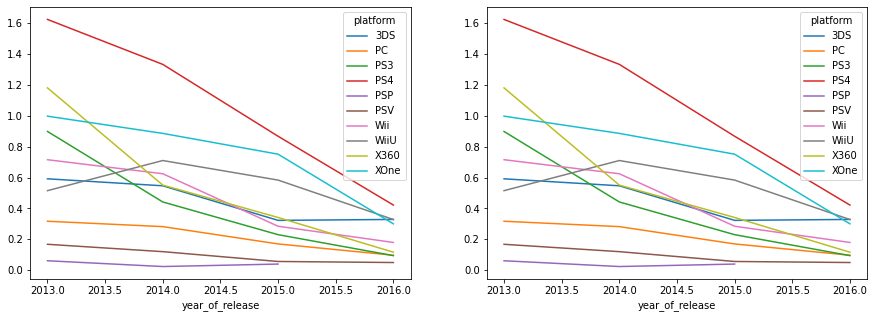

In [93]:
# Graph average sales by platform and year in df_active_platforms in 2013 onwards

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Build the first line plot
df_active_platforms[df_active_platforms['year_of_release'] >= 2013].pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='mean').plot(kind='line', ax=ax1)

# Build the second line plot
df_2013[df_2013['year_of_release'] >= 2013].pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='mean').plot(kind='line', ax=ax2)

plt.show()


### Mean sales are falling overall, But Why?
Is this an industry problem, or a macro economic problem?

### Take a look at how user and professional reviews affect sales for popular platform(s). 

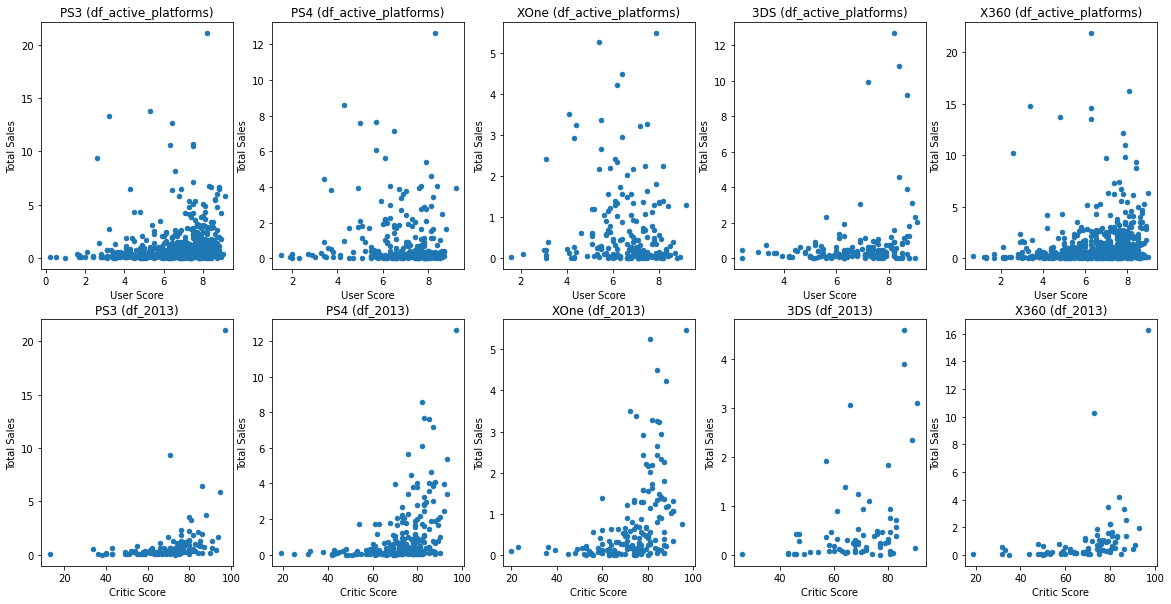

In [94]:
# Create a list of platforms
platforms = ['PS3', 'PS4', 'XOne', '3DS', 'X360']

# Create a figure with ten subplots
fig, axs = plt.subplots(2, 5, figsize=(20, 10))

# Iterate over the list of platforms
for i, platform in enumerate(platforms):
    # Select the data for the current platform in df_active_platforms
    df1 = df_active_platforms[df_active_platforms['platform'] == platform]
    # Create a scatter plot for the current platform in df_active_platforms
    df1.plot(kind='scatter', x='user_score', y='total_sales', ax=axs[0, i])
    axs[0, i].set_title(f'{platform} (df_active_platforms)')
    axs[0, i].set_xlabel('User Score')
    axs[0, i].set_ylabel('Total Sales')
    
    # Select the data for the current platform in df_2013
    df2 = df_2013[df_2013['platform'] == platform]
    # Create a scatter plot for the current platform in df_2013
    df2.plot(kind='scatter', x='critic_score', y='total_sales', ax=axs[1, i])
    axs[1, i].set_title(f'{platform} (df_2013)')
    axs[1, i].set_xlabel('Critic Score')
    axs[1, i].set_ylabel('Total Sales')

# Set the y-axis label for all subplots
plt.ylabel('Total Sales')

plt.show()


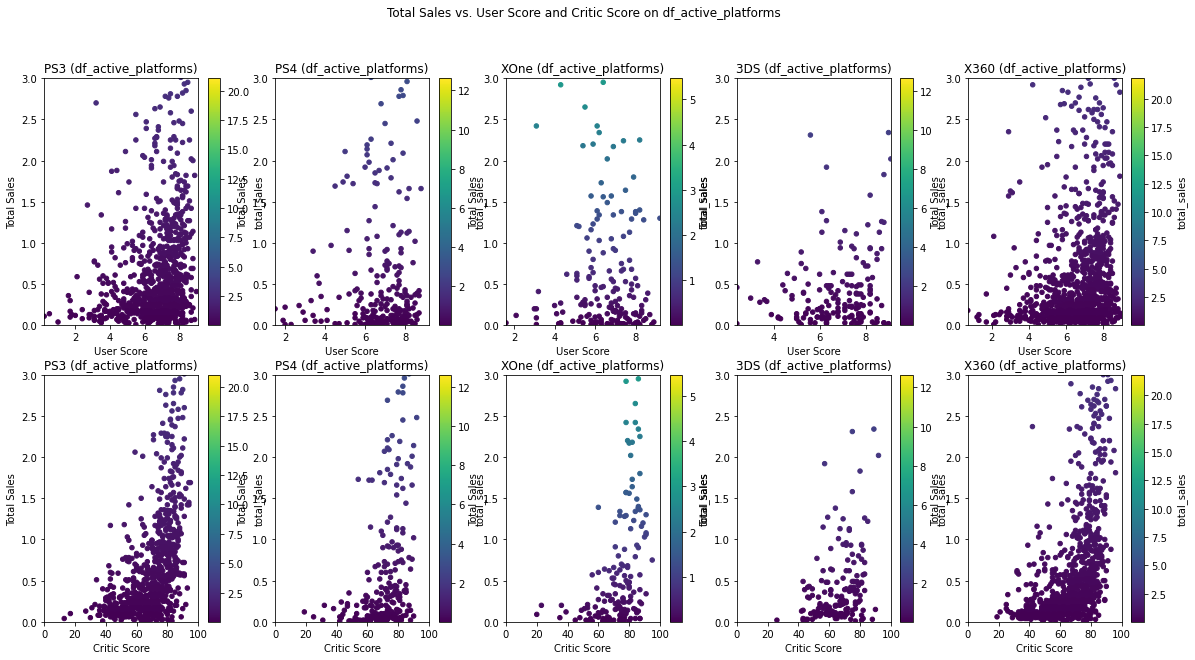

In [95]:
# # Create a list of platforms
# platforms = ['PS3', 'PS4', 'XOne', '3DS', 'X360']

# Set the figure size
fig, axs = plt.subplots(2, 5, figsize=(20, 10))

# Set the color map
cmap = sns.diverging_palette(240, 10, n=9)

# Iterate over the list of platforms
for i, platform in enumerate(platforms):
    # Select the data for the current platform in df_active_platforms
    df1 = df_active_platforms[df_active_platforms['platform'] == platform]
    # Create a scatter plot for the current platform in df_active_platforms
    df1.plot(kind='scatter', x='user_score', y='total_sales', ax=axs[0, i], c='total_sales', cmap = "viridis", colorbar=True)
    axs[0, i].set_title(f'{platform} (df_active_platforms)')
    axs[0, i].set_xlabel('User Score')
    axs[0, i].set_ylabel('Total Sales')
    axs[0, i].set_xlim(df1['user_score'].min(), df1['user_score'].max())
    axs[0, i].set_ylim(0, 3)
    
    # Select the data for the current platform in df_2013
    df2 = df_active_platforms[df_active_platforms['platform'] == platform]
    # Create a scatter plot for the current platform in df_2013
    df2.plot(kind='scatter', x='critic_score', y='total_sales', ax=axs[1, i], c='total_sales', cmap = "viridis", colorbar=True)
    axs[1, i].set_title(f'{platform} (df_active_platforms)')
    axs[1, i].set_xlabel('Critic Score')
    axs[1, i].set_ylabel('Total Sales')
    axs[1, i].set_xlim(0, 100)
    axs[1, i].set_ylim(0, 3)

# Set the figure title
fig.suptitle('Total Sales vs. User Score and Critic Score on df_active_platforms')

# Show the plot
plt.show()


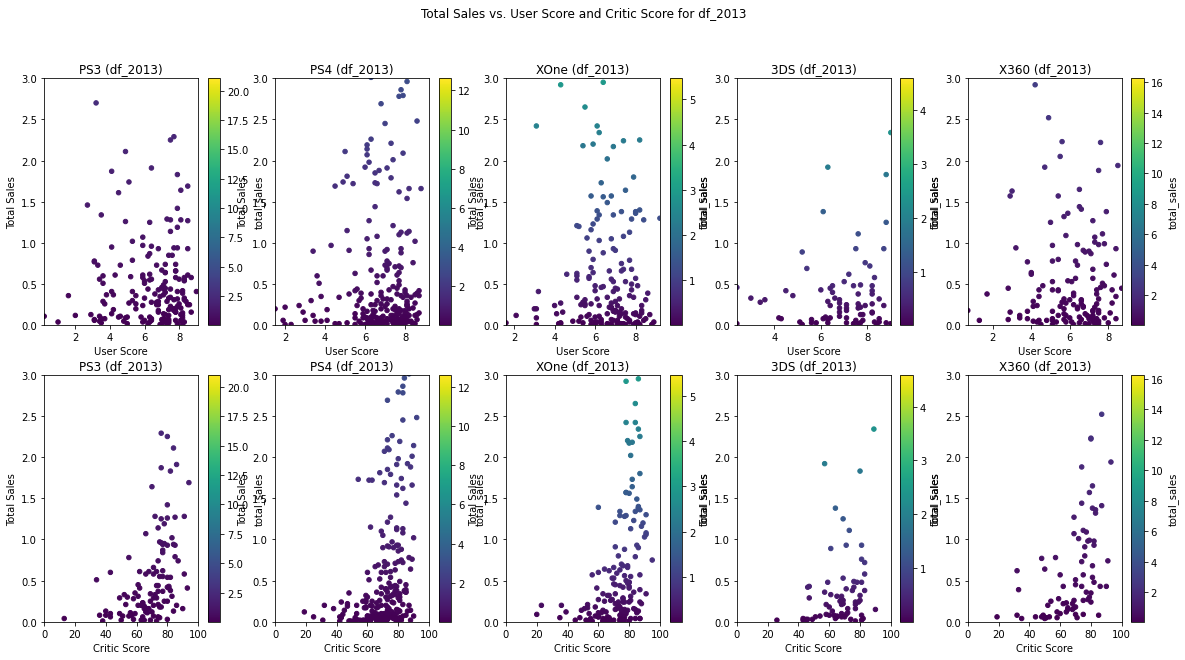

In [96]:
# Create a list of platforms
# platforms = ['PS3', 'PS4', 'XOne', '3DS', 'X360']

# Set the figure size
fig, axs = plt.subplots(2, 5, figsize=(20, 10))

# Set the color map
cmap = sns.diverging_palette(240, 10, n=9)

# Iterate over the list of platforms
for i, platform in enumerate(platforms):
    # Select the data for the current platform in df_active_platforms
    df1 = df_2013[df_2013['platform'] == platform]
    # Create a scatter plot for the current platform in df_active_platforms
    df1.plot(kind='scatter', x='user_score', y='total_sales', ax=axs[0, i], c='total_sales', cmap = "viridis", colorbar=True)
    axs[0, i].set_title(f'{platform} (df_2013)')
    axs[0, i].set_xlabel('User Score')
    axs[0, i].set_ylabel('Total Sales')
    axs[0, i].set_xlim(df1['user_score'].min(), df1['user_score'].max())
    axs[0, i].set_ylim(0, 3)
    
    # Select the data for the current platform in df_2013
    df2 = df_2013[df_2013['platform'] == platform]
    # Create a scatter plot for the current platform in df_2013
    df2.plot(kind='scatter', x='critic_score', y='total_sales', ax=axs[1, i], c='total_sales', cmap = "viridis", colorbar=True)
    axs[1, i].set_title(f'{platform} (df_2013)')
    axs[1, i].set_xlabel('Critic Score')
    axs[1, i].set_ylabel('Total Sales')
    axs[1, i].set_xlim(0, 100)
    axs[1, i].set_ylim(0, 3)

# Set the figure title
fig.suptitle('Total Sales vs. User Score and Critic Score for df_2013')

# Show the plot
plt.show()


The original prompt as I read it was to complete this annalysis for 1 platform. <br>
However I really wanted to see how the data varried between the 4 year and 10 year dataframes <br>
and once I had figured that out, it seemed like we might as well go ahead and run it on the top 5 platforms, just for kicks. <br>
Then I went back and added some color. <br>
The graphs trend demonstrates that games with higher scores tend to have improved sales. <br>
Interesting Code and Useful Learning Experience, <br>
PS3 and X360 both have a stronger coor() for the longer, 10 year data set, which makes sense as they are older platforms and get a lot more data from adding a few years to the dataset. <br>
In contrast, the whole of the the PS4 and XOne platform lifecycle is contained within the df_2013 dataset, and consequently their graphs are similar or identical. <br>
Critic Score seems to have the most impact on the XOne and PS4 platforms, with thick clustering above 60%. <br>


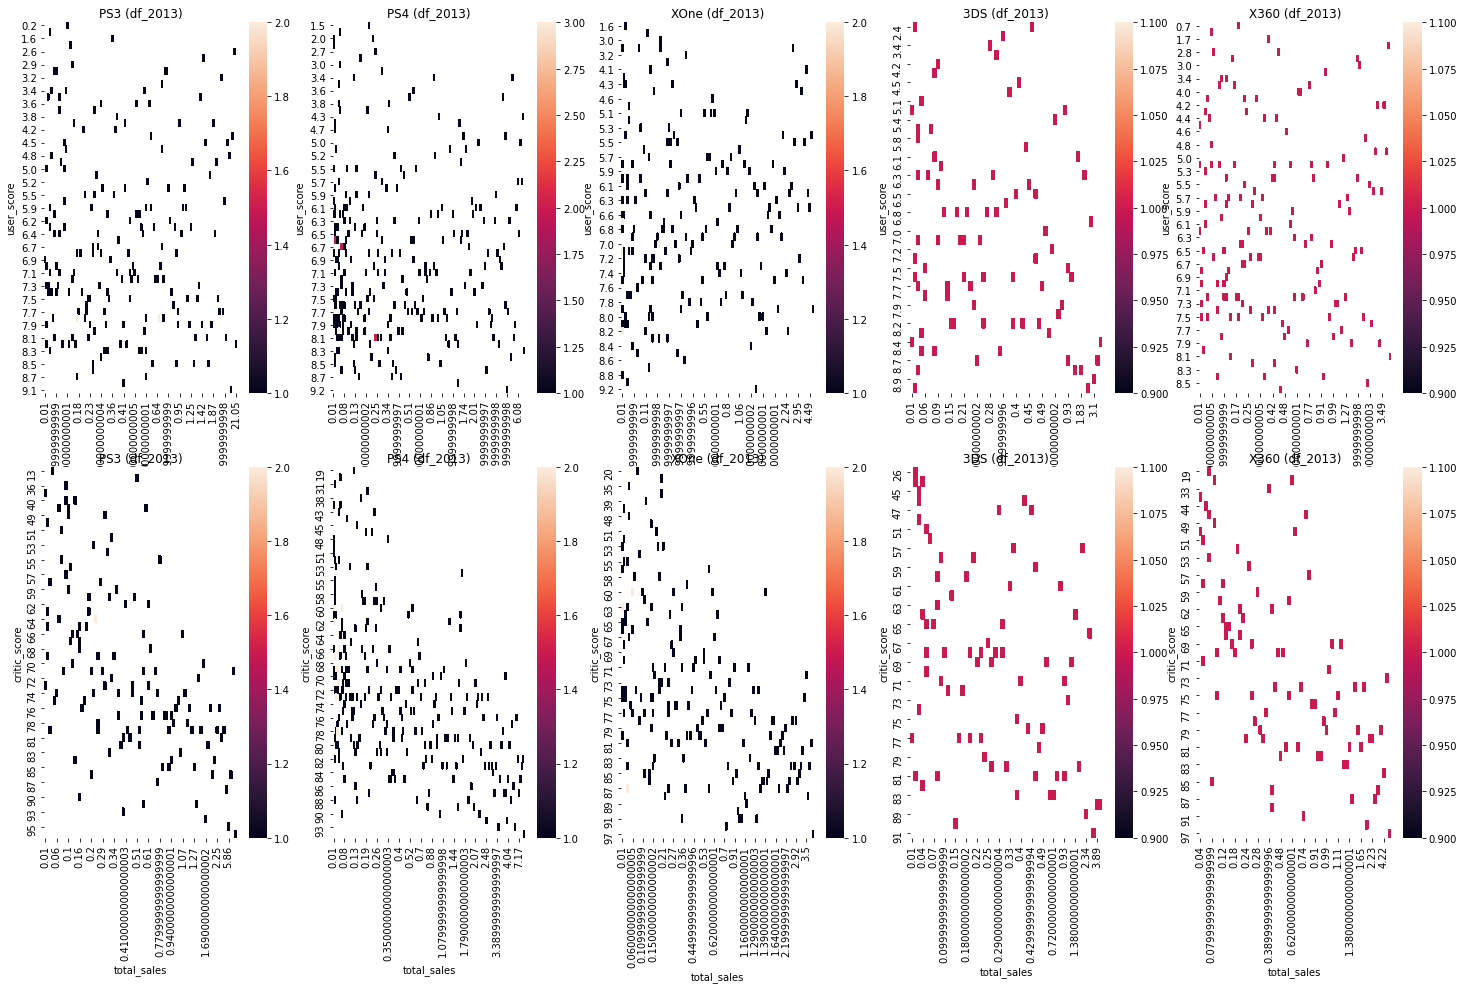

In [97]:
# Create a list of platforms
# platforms = ['PS3', 'PS4', 'XOne', '3DS', 'X360']

# Create a figure with ten subplots
fig, axs = plt.subplots(2, 5, figsize=(25, 15))

# Iterate over the list of platforms
for i, platform in enumerate(platforms):
    # Select the data for the current platform in df_2013
    df1 = df_2013[df_2013['platform'] == platform]
    # Reshape the data into a format suitable for creating a heatmap
    pivot1 = df1.pivot_table(index='user_score', columns='total_sales', values='name', aggfunc='count')
    # Create a heatmap for the current platform in df_2013
    sns.heatmap(pivot1, ax=axs[0, i])
    axs[0, i].set_title(f'{platform} (df_2013)')
    
    # Select the data for the current platform in df_2013
    df2 = df_2013[df_2013['platform'] == platform]
    # Reshape the data into a format suitable for creating a heatmap
    pivot2 = df2.pivot_table(index='critic_score', columns='total_sales', values='name', aggfunc='count')
    # Create a heatmap for the current platform in df_2013
    sns.heatmap(pivot2, ax=axs[1, i])
    axs[1, i].set_title(f'{platform} (df_2013)')

plt.show()

This beutiful chart makes perfect sense to me (#joke) - not really. <br>
It should be a coorilation between critical score and user score against total sales run on the 4 year dataframe - df_2013 <br>
But... beyond that it's hard to make heads or tails of it, quite a bit less informative than I expected it be. <br>


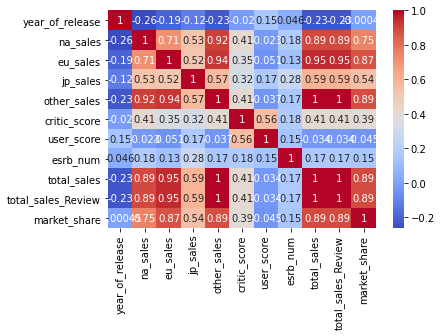

In [98]:
# Calculate the correlation between reviews and sales for PS4 in df_2013
df_2013_drop[df_2013_drop['platform'] == 'PS4'].corr()

# graph the resulting correlation for PS4 in df_active_platforms_drop in a heatmap
sns.heatmap(df_2013_drop[df_2013_drop['platform'] == 'PS4'].corr(), annot=True, cmap='coolwarm')
plt.show()


In [409]:
# Show all examples of other sales in df_2013_drop
df_2013_drop[df_2013_drop['platform'] == 'PS4'][['na_sales', 'eu_sales', 'jp_sales', 'other_sales']]

na_sales  eu_sales  jp_sales  other_sales
42         3.96      6.31      0.38         1.97
77         1.12      6.12      0.06         1.28
92         2.81      3.48      0.14         1.23
94         0.66      5.75      0.08         1.11
105        2.53      3.27      0.24         1.13
...         ...       ...       ...          ...
16486      0.01      0.00      0.00         0.00
16499      0.01      0.00      0.00         0.00
16500      0.00      0.00      0.01         0.00
16526      0.01      0.00      0.00         0.00
16530      0.01      0.00      0.00         0.00

[249 rows x 4 columns]

### Conclusions. <br>
User Score has a negative corrilation to North American and European sales. <br>
Critic score matters, but not as much as one might think. <br>
User Score and critic score corrilate at only 0.56 <br>
Curreously, the 249 rows of "other_sales" data has a corrilation to total sales of 1 - How and Why ??!!??<br>



### Digging into what is driving "Other Sales" is likely to be a fruitful area for future research. <br>


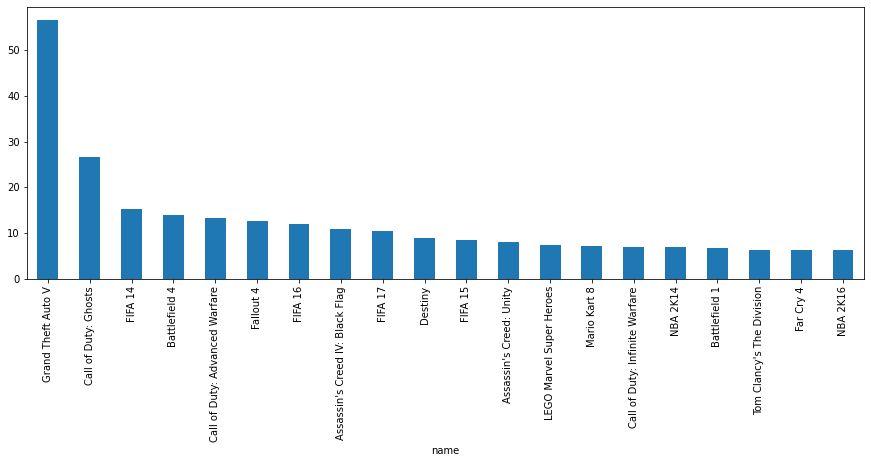

In [410]:
# What are the top 20 games accross all platforms
df_2013_drop.groupby('name')['total_sales'].sum().sort_values(ascending=False).head(20)

# Graph the result
df_2013_drop.groupby('name')['total_sales'].sum().sort_values(ascending=False).head(20).plot(kind='bar', figsize=(15, 5))
plt.show()


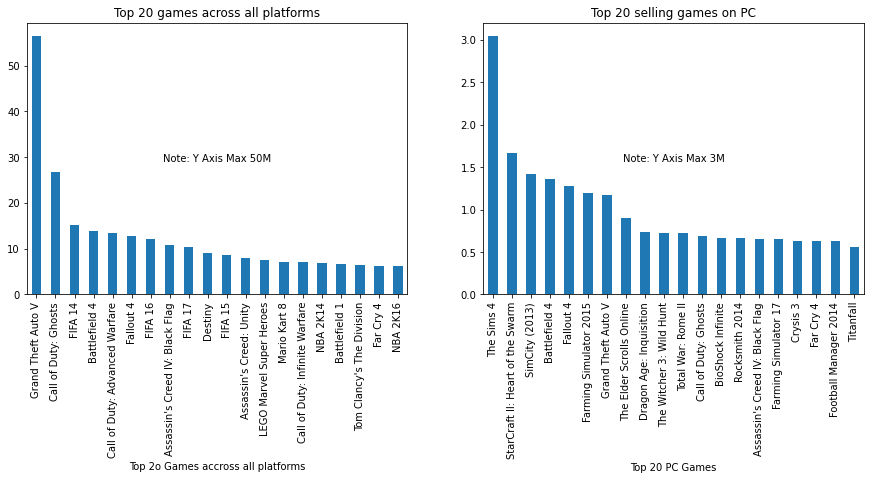

In [411]:
# import matplotlib.pyplot as plt

# Create a figure with 2 subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# First subplot - top 20 games across all platforms
df_2013_drop.groupby('name')['total_sales'].sum().sort_values(ascending=False).head(20).plot(kind='bar', ax=ax1)
ax1.set_title("Top 20 games across all platforms")
# x axis label - game name
ax1.set_xlabel("Top 2o Games accross all platforms")
# Add a note that Note: Y Axis Max 50M
ax1.text(0.5, 0.5, 'Note: Y Axis Max 50M', horizontalalignment='center', verticalalignment='center', transform=ax1.transAxes)

# Second subplot - top 20 selling games on PC
df_2013[df_2013['platform'] == 'PC'].groupby('name')['total_sales'].sum().sort_values(ascending=False).head(20).plot(kind='bar', ax=ax2)
ax2.set_title("Top 20 selling games on PC")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90)
# x axis label
ax2.set_xlabel("Top 20 PC Games")
# Add a note that the y axis on pc games is differenet - it tops out at 3 million
ax2.text(0.5, 0.5, 'Note: Y Axis Max 3M', horizontalalignment='center', verticalalignment='center', transform=ax2.transAxes)

# Show the plot
plt.show()


I always thought PC games represented a much larger % of the total market, and that there was more cross platform representation. <br>
An incorrect assumption on my part.

In [412]:
# Top 5 platforsm by total sales in df_2013
df_2013.groupby('platform')['total_sales'].sum().sort_values(ascending=False).head(5)

platform
PS4     314.14
PS3     181.43
XOne    159.32
3DS     144.12
X360    136.80
Name: total_sales, dtype: float64

Lets perform the corrilation annalysis on PS4 and XOne, two of the newer platforms with strong total sales.

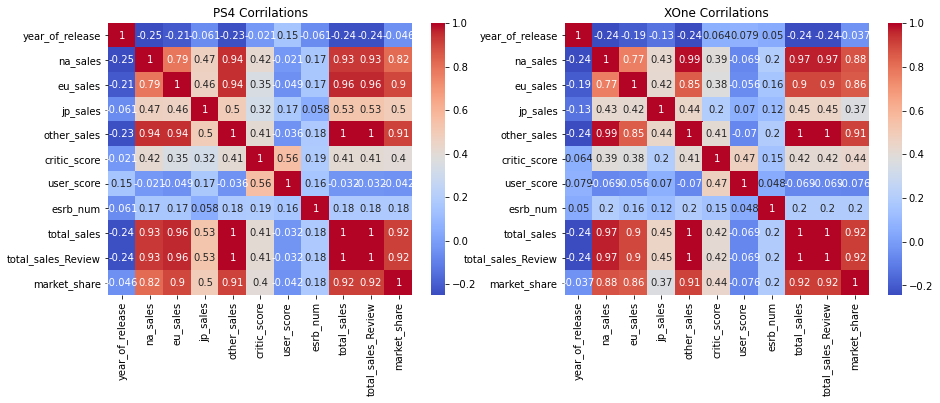

In [413]:
# perform Corr for PS4 in df_2013
df_2013[df_2013['platform'] == 'PS4'].corr()

# perform Corr for XOne in df_2013
df_2013[df_2013['platform'] == 'XOne'].corr()

# graph the resulting correlation for PS4 in df_2013 in a heatmap sidebyside with XOne
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
sns.heatmap(df_2013[df_2013['platform'] == 'PS4'].corr(), annot=True, cmap='coolwarm', ax=ax1)
# Title
ax1.set_title("PS4 Corrilations")
sns.heatmap(df_2013[df_2013['platform'] == 'XOne'].corr(), annot=True, cmap='coolwarm', ax=ax2)
# Title
ax2.set_title("XOne Corrilations")

plt.show()



I continue to be suprized how low the corrilation is between user scores, critical scores, and sales.

### Genre Analysis <br>
Organized by Total Sales, grouped by region and year <br>
also mean sales by genre to account for the number of titles released in a genre in a given year. <br>

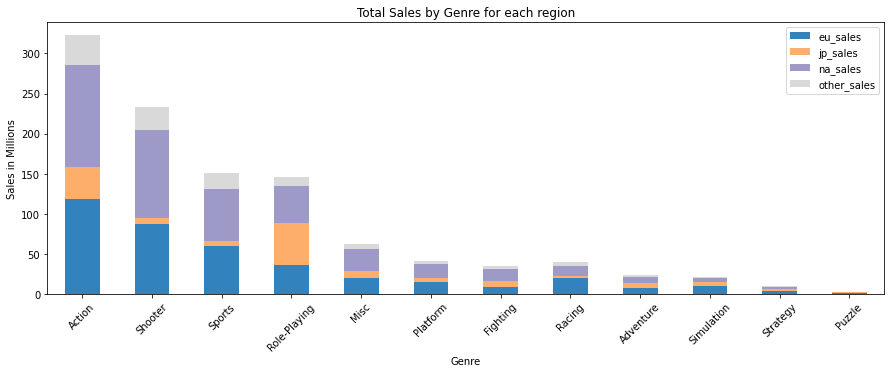

In [414]:
# Graph genre sales for reach region in df_2013
df_2013.pivot_table(index='genre', values=['na_sales', 'eu_sales', 'jp_sales', 'other_sales'], aggfunc='sum').sort_values(by='na_sales', ascending=False).plot(kind='bar', stacked=True, figsize=(15, 5), colormap='tab20c')
# rotate the x axis labels
plt.xticks(rotation=45)
# Title
plt.title("Total Sales by Genre for each region")
# y label
plt.ylabel("Sales in Millions")
# x label
plt.xlabel("Genre")

plt.show()

In [415]:
# How many games are released for each genre in df_2013
df_2013.groupby('genre')['name'].count().sort_values(ascending=False)


genre
Action          768
Role-Playing    294
Adventure       245
Sports          213
Shooter         188
Misc            155
Racing           86
Fighting         80
Platform         72
Simulation       62
Strategy         56
Puzzle           17
Name: name, dtype: int64

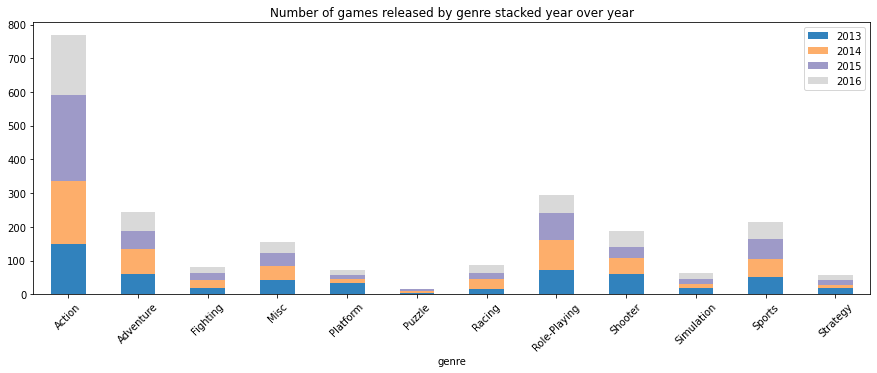

In [416]:
# games released by graph by genre stacked year over year in df_2013
df_2013.groupby(['genre', 'year_of_release'])['name'].count().unstack().plot(kind='bar', stacked=True, figsize=(15, 5), colormap='tab20c'), 
plt.legend(loc='upper right')
# rotate the x axis labels
plt.xticks(rotation=45)
# Number of games released by genre
plt.title("Number of games released by genre stacked year over year")

plt.show()

### Sidebar - that's complex annalysis to complete in just a few lines of code.  I'm impressed. Respect to all the people who have made this possible. ###

The graph above shows how many games for each genre were released year over year between 2013 and the end of our dataset in 2016 - Action, Role Playing, and Sports topping the list.

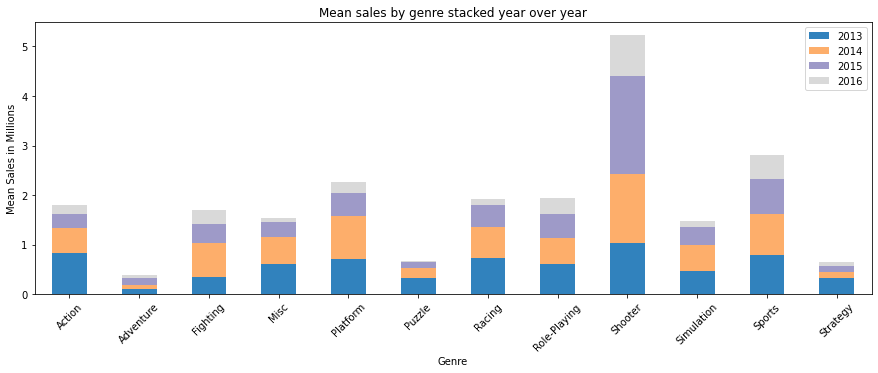

In [417]:
# Mean sales by genre stacked year over year in df_2013

# Graph mean sales by genre in df_2013, stacked year over year
df_2013.groupby(['genre', 'year_of_release'])['total_sales'].mean().unstack().plot(kind='bar', stacked=True, figsize=(15, 5), colormap='tab20c'),
plt.legend(loc='upper right')
# rotate the x axis labels
plt.xticks(rotation=45)
# Mean sales by genre
plt.title("Mean sales by genre stacked year over year")
# y axis label
plt.ylabel("Mean Sales in Millions")
# x axis label
plt.xlabel("Genre")

plt.show()

Dramatically different results when we organize our data by mean sales, with shooters out performing the other genres by an order of mangnitude, followed by sports and a suprize - platformers. <br>
Few platformers were released, but the ones that did tended to have strong unit sales. <br>

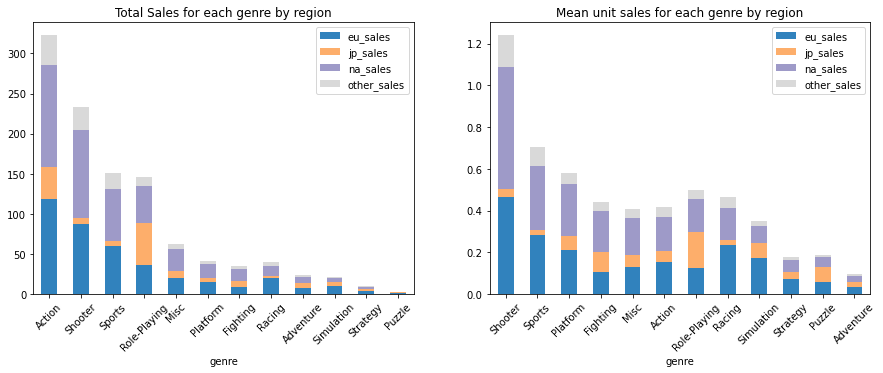

In [418]:
# Create a figure with 2 subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# First subplot - genre sales for each region
df_2013.pivot_table(index='genre', values=['na_sales', 'eu_sales', 'jp_sales', 'other_sales'], aggfunc='sum').sort_values(by='na_sales', ascending=False).plot(kind='bar', stacked=True, ax=ax1, colormap='tab20c')
ax1.set_title("Total Sales for each genre by region")
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)

# Second subplot - mean unit sales for each genre
df_2013.pivot_table(index='genre', values=['na_sales', 'eu_sales', 'jp_sales', 'other_sales'], aggfunc='mean').sort_values(by='na_sales', ascending=False).plot(kind='bar', stacked=True, ax=ax2, colormap='tab20c')
ax2.set_title("Mean unit sales for each genre by region")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45)

# Show the plot
plt.show()


Mean Sales and Total Sales by Genre deffinetly have different restults. <br>
This will effect resource allocation depending on if our advertizing and merketing stratedgy is backing individual platforms, individual games, genres of games, and if we're allocating resources by region, or globally.

### Genre Section Conclusions
Global Sales Are lead by Action, Shooter, and Sports, <br>
However unit sales are lead by Shooter, Sports, and Platform. <br>


# Step 4. Create a user profile for each region <br>
Once the general patterns and relationships in the data have been identified, the next step in the project is to create a user profile for each region. This can involve analyzing the data for each region separately, to identify any regional variations or trends that may be relevant for predicting the success of a game.

To start, the top five platforms in each region can be identified, along with their market share in that region. This can help to identify any regional variations in platform popularity, and can provide insight into the preferences of users in each region. By comparing the market shares of different platforms across regions, it should be possible to identify any significant differences, and to draw conclusions about the most popular platforms in each region.

Next, the top five genres in each region can be identified and analyzed. This can help to identify any regional variations in genre popularity, and can provide insight into the types of games that are most popular in each region. By comparing the popularity of different genres across regions, it should be possible to identify any significant differences, and to draw conclusions about the most profitable genres in each region.

Finally, the impact of ESRB ratings on game sales in each region can be examined. This can involve analyzing the data to identify any relationships between ESRB ratings and game sales in each region, and drawing conclusions about the impact of these ratings on game sales in that region.

Overall, the goal of this step is to create a user profile for each region, by analyzing the data for that region to identify any regional variations or trends that may be relevant for predicting the success of a game. By understanding the preferences and behaviors of users in each region, it should be possible to tailor advertising and marketing campaigns to maximize their impact and effectiveness.

In [419]:
def top_5_platforms(region):
    df_2013_region = df_2013.pivot_table(index='platform', values=region + '_sales', aggfunc='sum').sort_values(by=region + '_sales', ascending=False).head(5)
    df_2013_region['platform_total_sales'] = df_2013[df_2013['platform'].isin(df_2013_region.index)].groupby('platform')[region + '_sales'].sum()
    df_2013_region['platform_total_sales_percentage'] = df_2013_region['platform_total_sales'] / df_2013_region['platform_total_sales'].sum()
    df_2013_region['platform_total_sales_percentage'] = df_2013_region['platform_total_sales_percentage'].apply(lambda x: str(round(x * 100, 2)) + '%')
    return df_2013_region


In [420]:
# test the function
top_5_platforms('na')

na_sales  platform_total_sales platform_total_sales_percentage
platform                                                                
PS4         108.74                108.74                          28.19%
XOne         93.12                 93.12                          24.14%
X360         81.66                 81.66                          21.17%
PS3          63.50                 63.50                          16.46%
3DS          38.76                 38.76                          10.05%

In [421]:
# Describe variations in their market shares from region to region.

print(top_5_platforms('na'))

print(top_5_platforms('eu'))

print(top_5_platforms('jp'))

print(top_5_platforms('other'))

# Store the data for all the regions in a new dataframe

df_top_5_platforms_global = pd.concat([top_5_platforms('na'), top_5_platforms('eu'), top_5_platforms('jp'), top_5_platforms('other')], axis=1)
#df_top_5_platforms


# head()
df_top_5_platforms_global.head()

          na_sales  platform_total_sales platform_total_sales_percentage
platform                                                                
PS4         108.74                108.74                          28.19%
XOne         93.12                 93.12                          24.14%
X360         81.66                 81.66                          21.17%
PS3          63.50                 63.50                          16.46%
3DS          38.76                 38.76                          10.05%
          eu_sales  platform_total_sales platform_total_sales_percentage
platform                                                                
PS4         141.09                141.09                          42.22%
PS3          67.81                 67.81                          20.29%
XOne         51.59                 51.59                          15.44%
X360         42.52                 42.52                          12.72%
3DS          31.17                 31.17           

na_sales  platform_total_sales platform_total_sales_percentage  \
platform                                                                   
PS4         108.74                108.74                          28.19%   
XOne         93.12                 93.12                          24.14%   
X360         81.66                 81.66                          21.17%   
PS3          63.50                 63.50                          16.46%   
3DS          38.76                 38.76                          10.05%   

          eu_sales  platform_total_sales platform_total_sales_percentage  \
platform                                                                   
PS4         141.09                141.09                          42.22%   
XOne         51.59                 51.59                          15.44%   
X360         42.52                 42.52                          12.72%   
PS3          67.81                 67.81                          20.29%   
3DS          31.17                 31.17                           9.33%   

          jp_sales  platform_total_sales platform_total_sales_percentage  \
platform                                                                   
PS4          15.96                 15.96                          11.68%   
XOne           NaN                   NaN                             NaN   
X360           NaN                   NaN                             NaN   
PS3          23.35                 23.35                          17.08%   
3DS          67.84                 67.84                          49.63%   

          other_sales  platform_total_sales platform_total_sales_percentage  
platform                                                                     
PS4             48.35                 48.35                          44.83%  
XOne            14.27                 14.27                          13.23%  
X360            12.11                 12.11                          11.23%  
PS3             26.77                 26.77                          24.82%  
3DS              6.35                  6.35                           5.89%

In [422]:
# Write a unit test to see if each region platform_total_sales_percentage column adds up to 100%

for region in ['na', 'eu', 'jp', 'other']:
    print(region + '_sum: ' + str(top_5_platforms(region)['platform_total_sales_percentage'].apply(lambda x: float(x.replace('%', ''))).sum()))

na_sum: 100.01
eu_sum: 100.0
jp_sum: 100.00000000000001
other_sum: 100.00000000000001


In [423]:
### This function takes df_2013 dataframe as input, it then loops through all the regions, uses the pivot table to find top-5 platforms in each region, concatenates each region's dataframe along the columns, and returns the final dataframe containing top-5 platforms of each region. ###

def top_5_platforms_all_regions(df):
    regions = ['na','eu','jp','other']
    df_top_5_platforms_all_regions = pd.DataFrame()
    for region in regions:
        df_region = df.pivot_table(index='platform', values=region + '_sales', aggfunc='sum').sort_values(by=region + '_sales', ascending=False).head(5)
        df_top_5_platforms_all_regions = pd.concat([df_top_5_platforms_all_regions,df_region], axis=1)
    return df_top_5_platforms_all_regions


In [424]:
# You can call this function by passing in the df_2013 Dataframe as an argument:
df_top_5_platforms_all_regions = top_5_platforms_all_regions(df_2013)

# head()
df_top_5_platforms_all_regions.head(15)

na_sales  eu_sales  jp_sales  other_sales
platform                                           
PS4         108.74    141.09     15.96        48.35
XOne         93.12     51.59       NaN        14.27
X360         81.66     42.52       NaN        12.11
PS3          63.50     67.81     23.35        26.77
3DS          38.76     31.17     67.84         6.35
PSV            NaN       NaN     18.66          NaN
WiiU           NaN       NaN     10.88          NaN

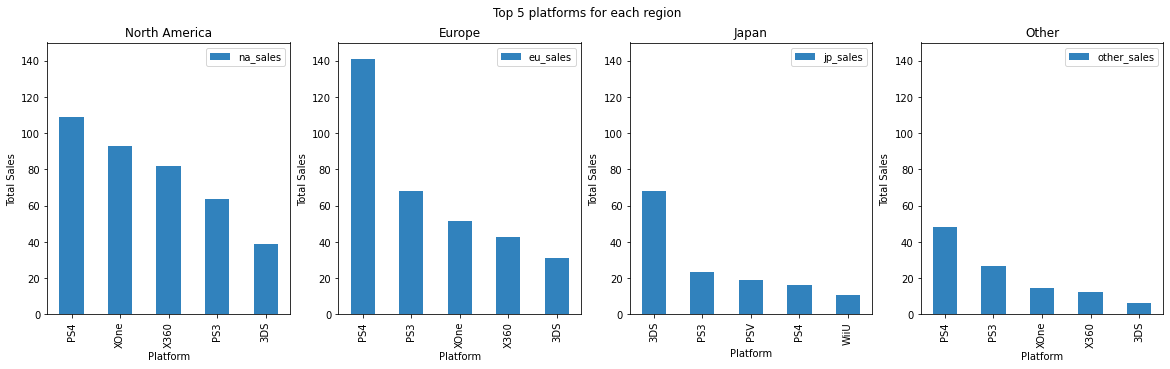

In [425]:
# Graph the Top 5 platforms for each region

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(20, 5))
fig.suptitle('Top 5 platforms for each region')

# Standardize the y-axis at 150 using set_ylim()
ax1.set_ylim(0, 150)
ax2.set_ylim(0, 150)
ax3.set_ylim(0, 150)
ax4.set_ylim(0, 150)

df_2013.pivot_table(index='platform', values='na_sales', aggfunc='sum').sort_values(by='na_sales', ascending=False).head(5).plot(kind='bar', ax=ax1, colormap='tab20c')
ax1.set_title("North America")
ax1.set_xlabel("Platform")
ax1.set_ylabel("Total Sales")

df_2013.pivot_table(index='platform', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales', ascending=False).head(5).plot(kind='bar', ax=ax2, colormap='tab20c')
ax2.set_title("Europe")
ax2.set_xlabel("Platform")
ax2.set_ylabel("Total Sales")

df_2013.pivot_table(index='platform', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending=False).head(5).plot(kind='bar', ax=ax3, colormap='tab20c')
ax3.set_title("Japan")
ax3.set_xlabel("Platform")
ax3.set_ylabel("Total Sales")

df_2013.pivot_table(index='platform', values='other_sales', aggfunc='sum').sort_values(by='other_sales', ascending=False).head(5).plot(kind='bar', ax=ax4, colormap='tab20c')
ax4.set_title("Other")
ax4.set_xlabel("Platform")
ax4.set_ylabel("Total Sales")

plt.show()

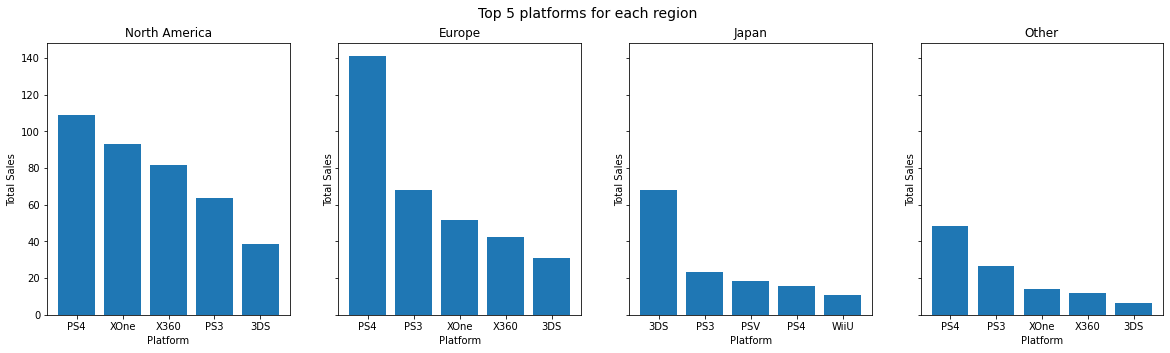

In [134]:
# Reviewer's code 2

fig, ax = plt.subplots(1, 4, figsize=(20, 5),sharey=True)  # ax is a list here


titles = ["North America", "Europe", "Japan","Other" ]

for i, reg in enumerate(['na_sales', 'eu_sales', 'jp_sales', 'other_sales']):
    df_to_plot = df_2013.pivot_table(index='platform', values=reg, 
                    aggfunc='sum').sort_values(by=reg, ascending=False).head(5)
    
    ax[i].bar(df_to_plot.index, df_to_plot[reg])
    ax[i].set(xlabel='Platform', ylabel='Total Sales', title=titles[i])


plt.suptitle('Top 5 platforms for each region', fontsize=14)
plt.show()

Only in Japan is WiiU in the top 5 platforms. <br>
Japan also seems to have early access to the PSV (Play Station 5, we assume?), which is not represented in the other regions. <br>
Similarly Japan's leadng platform is 3DS, which ranks 5th in the other regions. <br>
Preliminary analysis would suggest there are significant differences between the Japanese market and the rest of the world. <br>
We should plan accordingly. <br>
PS$ leads in both North America and Europe <br>
I don't trust 'other_data' because it has a corr() of 1 with total_sales <br>

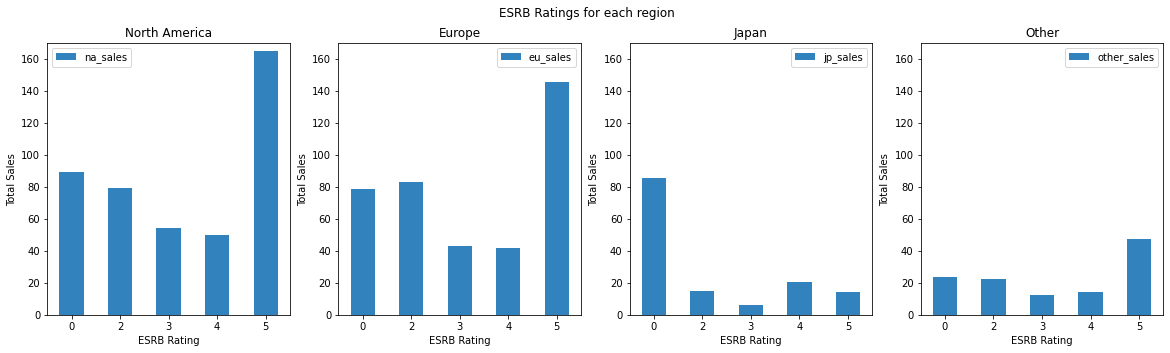

In [426]:
# Graph ESRB ratings for each region

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(20, 5))
fig.suptitle('ESRB Ratings for each region')

# Standardize the y-axis at 170 using set_ylim()
ax1.set_ylim(0, 170)
ax2.set_ylim(0, 170)
ax3.set_ylim(0, 170)
ax4.set_ylim(0, 170)

# Change the bar levels to be in order of the ESRB rating
df_2013.pivot_table(index='esrb_num', values='na_sales', aggfunc='sum').sort_values(by='esrb_num', ascending=True).plot(kind='bar', ax=ax1, colormap='tab20c')

ax1.set_title("North America")
ax1.set_xlabel("ESRB Rating")
ax1.set_ylabel("Total Sales")

df_2013.pivot_table(index='esrb_num', values='eu_sales', aggfunc='sum').sort_values(by='esrb_num', ascending=True).plot(kind='bar', ax=ax2, colormap='tab20c')
ax2.set_title("Europe")
ax2.set_xlabel("ESRB Rating")
ax2.set_ylabel("Total Sales")

df_2013.pivot_table(index='esrb_num', values='jp_sales', aggfunc='sum').sort_values(by='esrb_num', ascending=True).plot(kind='bar', ax=ax3, colormap='tab20c')
ax3.set_title("Japan")
ax3.set_xlabel("ESRB Rating")
ax3.set_ylabel("Total Sales")

df_2013.pivot_table(index='esrb_num', values='other_sales', aggfunc='sum').sort_values(by='esrb_num', ascending=True).plot(kind='bar', ax=ax4, colormap='tab20c')
ax4.set_title("Other")
ax4.set_xlabel("ESRB Rating")
ax4.set_ylabel("Total Sales")

# Legend 'esrb_num' == 'rating'
# 0 == 'NA'
# 1 == 'EC'
# 2 == 'E'
# 3 == 'E10+'
# 4 == 'T'
# 5 == 'M'

# rotate the x-axis labels for all 4 graphs.
for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=0)

plt.show()


North America and Europe have a strong preference for Mature Games, Japan less so. <br>
Japan is missing a lot of data in comparison to all available games sold in Japan. <br>
Japan's top performing category is Teen <br>

### Step 5. Test the following hypotheses: <br>
Once a user profile has been created for each region, the next step is to test various hypotheses about the data. This can involve formulating null and alternative hypotheses, selecting a significance level, and conducting statistical tests to evaluate the hypotheses.

To start, two hypotheses can be tested:

Hypothesis 1: The average user ratings of the Xbox One and PC platforms are the same.
Hypothesis 2: The average user ratings for the Action and Sports genres are different.
To test these hypotheses, the null and alternative hypotheses must be formulated. For Hypothesis 1, the null hypothesis would be that the average user ratings of the Xbox One and PC platforms are the same, while the alternative hypothesis would be that the average user ratings of the Xbox One and PC platforms are different.

For Hypothesis 2, the null hypothesis would be that the average user ratings for the Action and Sports genres are the same, while the alternative hypothesis would be that the average user ratings for the Action and Sports genres are different.

Once the null and alternative hypotheses have been formulated, the next step would be to select a significance level to test the hypotheses. This is important because the significance level determines the likelihood that the results of the test are due to chance, rather than being a true reflection of the data.

In this case, a significance level of 0.05 could be chosen. This means that there is a 5% chance that the results of the test are due to chance, and a 95% chance that they reflect a true difference between the groups being compared. This significance level is commonly used in statistical tests, and is considered a good balance between the need to reject the null hypothesis when it is false, and the need to avoid rejecting the null hypothesis when it is true.

Once the significance level has been chosen, the data can be analyzed using appropriate statistical tests to evaluate the hypotheses. For Hypothesis 1, a two-sample t-test could be used to compare the average user ratings of the Xbox One and PC platforms. For Hypothesis 2, a two-sample t-test could also be used to compare the average user ratings for the Action and Sports genres.

These tests can help to determine whether the null hypothesis should be rejected or not, based on the significance level that was chosen. If the null hypothesis is rejected, this indicates that there is a significant difference between the groups being compared, and the alternative hypothesis is likely to be true. If the null hypothesis is not rejected, this indicates that there is not a significant difference between the groups, and the null hypothesis is likely to be true.

Overall, the goal of this step is to test hypotheses about the data using appropriate statistical tests, and to use the results of these tests to evaluate the hypotheses and draw conclusions about the data. By testing these hypotheses, it should be possible to gain a deeper understanding of the patterns and relationships in the data, and to use this knowledge to make more accurate predictions about the success of a video game.

In [427]:
# Null hypothesis: Average user ratings of the Xbox One and PC platforms are the same

# Switching to df_2013_drop because we were getting a lot of null values in the user_score column

alpha = 0.05

# create a new dataframe called 'df_active_platforms_drop_xbox_one' and filter the 'df_active_platforms_drop' dataframe for 'platform' == 'XOne'
df_active_platforms_drop_xbox_one = df_2013_drop.query('platform == "XOne"')

# create a new dataframe called 'df_active_platforms_drop_pc' and filter the 'df_active_platforms_drop' dataframe for 'platform' == 'PC'
df_active_platforms_drop_pc = df_2013_drop.query('platform == "PC"')

# calculate the mean and standard deviation of the 'user_score' column for 'df_active_platforms_drop_xbox_one'
mean_xbox_one = df_active_platforms_drop_xbox_one['user_score'].mean()
std_xbox_one = df_active_platforms_drop_xbox_one['user_score'].std()

# calculate the mean and standard deviation of the 'user_score' column for 'df_active_platforms_drop_pc'
mean_pc = df_active_platforms_drop_pc['user_score'].mean()
std_pc = df_active_platforms_drop_pc['user_score'].std()

# calculate the standard error of the mean for 'df_active_platforms_drop_xbox_one'
sem_xbox_one = std_xbox_one / np.sqrt(len(df_active_platforms_drop_xbox_one['user_score']))

# calculate the standard error of the mean for 'df_active_platforms_drop_pc'
sem_pc = std_pc / np.sqrt(len(df_active_platforms_drop_pc['user_score']))

# calculate the difference between the means of 'df_active_platforms_drop_xbox_one' and 'df_active_platforms_drop_pc'
mean_difference = mean_xbox_one - mean_pc

# calculate the standard error of the difference between the means of 'df_active_platforms_drop_xbox_one' and 'df_active_platforms_drop_pc'
sem_difference = np.sqrt(sem_xbox_one**2 + sem_pc**2)

# calculate the t-statistic
t_statistic = mean_difference / sem_difference

# calculate the degrees of freedom
degrees_of_freedom = len(df_active_platforms_drop_xbox_one['user_score']) + len(df_active_platforms_drop_pc['user_score']) - 2

# calculate the p-value
xbox_one_p_value_test_1 = 2 * (1 - stats.t.cdf(t_statistic, df=degrees_of_freedom))

# calculate the p-value
xbox_one_p_value_test_2 = stats.t.sf(np.abs(t_statistic), df=degrees_of_freedom) * 2

# calculate the p-value
# # Update from Practicum Slack Channel - this is the best test to use
xbox_one_p_value_test_3 = stats.ttest_ind(df_active_platforms_drop_xbox_one['user_score'],df_active_platforms_drop_pc['user_score'], equal_var=False)[1]


# print the results
print('Mean Xbox One: ', mean_xbox_one)
print('Mean PC: ', mean_pc)
print('Standard Deviation Xbox One: ', std_xbox_one)
print('Standard Deviation PC: ', std_pc)
print('Standard Error of the Mean Xbox One: ', sem_xbox_one)
print('Standard Error of the Mean PC: ', sem_pc)
print('Difference in means: ', mean_difference)
print('Standard Error of the Difference: ', sem_difference)
print('t-statistic: ', t_statistic)
print('degrees of freedom: ', degrees_of_freedom)
# print('p-value: ', p_value)
print('p-value test 1: ', xbox_one_p_value_test_1)
print('p-value test 2: ', xbox_one_p_value_test_2)
print('Update from Practicum Slack Channel - Test 3 is the best test to use -- ')
print('p-value test 3: ', xbox_one_p_value_test_3)

# Calculate and print weather or not the null hypothesis can be rejected
if xbox_one_p_value_test_3 < alpha:
    print('We reject the null hypothesis')
else:
    print('We fail to reject the null hypothesis')
    


Mean Xbox One:  6.538181818181819
Mean PC:  6.312582781456952
Standard Deviation Xbox One:  1.3402981433554406
Standard Deviation PC:  1.7050241302598068
Standard Error of the Mean Xbox One:  0.10434206894638601
Standard Error of the Mean PC:  0.13875289591317647
Difference in means:  0.2255990367248666
Standard Error of the Difference:  0.17360769993380235
t-statistic:  1.299475984134856
degrees of freedom:  314
p-value test 1:  0.1947338741276412
p-value test 2:  0.19473387412764126
Update from Practicum Slack Channel - Test 3 is the best test to use -- 
p-value test 3:  0.19483289586487235
We fail to reject the null hypothesis


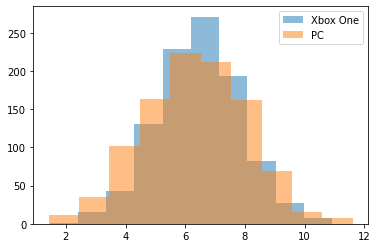

In [428]:
# graph the results
xbox_one = np.random.normal(loc=mean_xbox_one, scale=std_xbox_one, size=1000)
pc = np.random.normal(loc=mean_pc, scale=std_pc, size=1000)

plt.hist(xbox_one, alpha=0.5, label='Xbox One')
plt.hist(pc, alpha=0.5, label='PC')
plt.legend(loc='upper right')
plt.show()

### We fail to reject the null hypothesis
The results of our analysis indicate that we are unable to reject the null hypothesis, which suggests that the ratings provided by Xbox and PC users are similar enough. This outcome was unexpected, as we initially believed that the null hypothesis would be rejected.

In [429]:
# Null hypothesis: Average user ratings for the Action and Sports genres are the same
# use the df_active_genres_drop DataFrame

# alpha value
alpha = 0.05

# create a new dataframe called 'df_active_genres_drop_action' and filter the 'df_active_platforms' dataframe for 'genre' == 'Action'
df_active_genres_drop_action = df_2013_drop.query('genre == "Action"')

# create a new dataframe called 'df_active_genres_drop_sports' and filter the 'df_active_platforms' dataframe for 'genre' == 'Sports'
df_active_genres_drop_sports = df_2013_drop.query('genre == "Sports"')

# calculate the mean and standard deviation of the 'user_score' column for 'df_active_genres_drop_action'
mean_action = df_active_genres_drop_action['user_score'].mean()
std_action = df_active_genres_drop_action['user_score'].std()

# calculate the mean and standard deviation of the 'user_score' column for 'df_active_genres_drop_sports'
mean_sports = df_active_genres_drop_sports['user_score'].mean()
std_sports = df_active_genres_drop_sports['user_score'].std()

# calculate the standard error of the mean for 'df_active_genres_drop_action'
sem_action = std_action / np.sqrt(len(df_active_genres_drop_action['user_score']))

# calculate the standard error of the mean for 'df_active_genres_drop_sports'
sem_sports = std_sports / np.sqrt(len(df_active_genres_drop_sports['user_score']))

# calculate the difference between the means of 'df_active_genres_drop_action' and 'df_active_genres_drop_sports'
mean_difference = mean_action - mean_sports

# calculate the standard error of the difference between the means of 'df_active_genres_drop_action' and 'df_active_genres_drop_sports'
sem_difference = np.sqrt(sem_action**2 + sem_sports**2)

# calculate the t-statistic
t_statistic = mean_difference / sem_difference

# calculate the degrees of freedom
degrees_of_freedom = len(df_active_genres_drop_action['user_score']) + len(df_active_genres_drop_sports['user_score']) - 2

# calculate the p-value
action_p_value_test_1 = 2 * (1 - stats.t.cdf(t_statistic, df=degrees_of_freedom))

# calculate the p-value
action_p_value_test_2 = stats.t.sf(np.abs(t_statistic), df=degrees_of_freedom) * 2

# calculate the p-value
# # Update from Practicum Slack Channel - this is the best test to use
action_p_value_test_3 = stats.ttest_ind(df_active_genres_drop_action['user_score'],df_active_genres_drop_sports['user_score'], equal_var=False)[1]


# print the results
print('Mean Action: ', mean_action)
print('Mean Sports: ', mean_sports)
print('Standard Deviation Action: ', std_action)
print('Standard Deviation Sports: ', std_sports)
print('Standard Error of the Mean Action: ', sem_action)
print('Standard Error of the Mean Sports: ', sem_sports)
print('Difference in means: ', mean_difference)
print('Standard Error of the Difference: ', sem_difference)
print('t-statistic: ', t_statistic)
print('degrees of freedom: ', degrees_of_freedom)
# print('p-value: ', p_value)
print('p-value test 1: ', action_p_value_test_1)
print('p-value test 2: ', action_p_value_test_2)
print('Update from Practicum Slack Channel - Test 3 is the best test to use -- ')
print('p-value test 3: ', action_p_value_test_3)

# Calculate and print weather or not the null hypothesis can be rejected
if action_p_value_test_3 < alpha:
    print('We reject the null hypothesis')
else:
    print('We fail to reject the null hypothesis')


Mean Action:  6.933865814696484
Mean Sports:  5.665454545454544
Standard Deviation Action:  1.280300723843838
Standard Deviation Sports:  1.4600135957414202
Standard Error of the Mean Action:  0.07236687554150141
Standard Error of the Mean Sports:  0.1392068343329382
Difference in means:  1.2684112692419403
Standard Error of the Difference:  0.15689329941280877
t-statistic:  8.084547102961793
degrees of freedom:  421
p-value test 1:  6.661338147750939e-15
p-value test 2:  6.6950956376963055e-15
Update from Practicum Slack Channel - Test 3 is the best test to use -- 
p-value test 3:  1.0788014883154692e-13
We reject the null hypothesis


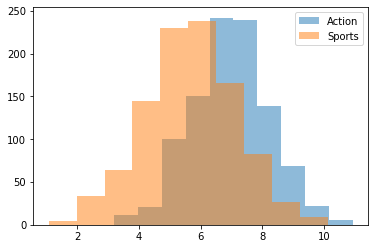

In [430]:
# graph the results
action = np.random.normal(loc=mean_action, scale=std_action, size=1000)
sports = np.random.normal(loc=mean_sports, scale=std_sports, size=1000)

plt.hist(action, alpha=0.5, label='Action')
plt.hist(sports, alpha=0.5, label='Sports')
plt.legend(loc='upper right')
plt.show()

### We reject the null hypothesis
The results of our analysis indicate that we have rejected the null hypothesis, which stated that the average user ratings for the Action and Sports genres are the same. This suggests that there is a statistically significant difference in the ratings provided for these two genres. The rejection of the null hypothesis means that our data provides evidence that the ratings are not equal.

### Why we Chose to use an Alpha of 0.05

Common practice: In many fields, a significance level of 0.05 is a commonly used standard. This may be due in part to the fact that it provides a good balance between the risk of making a type I error (rejecting the null hypothesis when it is true) and the risk of making a type II error (failing to reject the null hypothesis when it is false).

Decision-making: A significance level of 0.05 can be useful in decision-making because it allows you to draw conclusions with some level of confidence. If you reject the null hypothesis at the 0.05 level, it means that there is only a 5% chance that you are making a type I error, which is often considered to be an acceptable level of risk.

### The Null Hypothisis
We've formulatd our null hypothisis by dialing in two questions. <br>
* Do Users of different platforms have different mean user scores for the games they are playing <br>
* Do mean user ratings for the Action and Sports genres vary <br>

We found that ratings of games accross platforms are simmilar. <br>
and that ratings accross genres have higher variance. <br>

### Summary for our Business

Our Statistical Test thus far have focused on user scores, however I propose the information we're truly after is which if these categories has the strongest corrilation to total sales. <br>
On that note, I feel it is worth pointing out that User Score and Total Sales have a relatively weak corrilation to sales. <bR>
<br>
Perhaps a useful way to think about this data set would be: <br>
* Platform and region determine the addessable market for each game released - Broadly speaking, a user who owns only an Xbox is unlikely to buy a PS4 game. Users are locked into buying games for platforms they own. Consequently platform market share per region has a significant impact on sales of any individual game<br>
* 
* On the balance, Japan purchases fewer games then Europe or North America - invest accordingly. <br>
* ESRB Rating has a significant impact on total sales, although games are likely designed with this in mind, and designed to fit specific nitches in the marketplace. Action and shooting games occupy the bulk of the market, but there are also lots of these games produced every year. In contrast, focusing in on under represented specific nitches such as platformers with specific ESRB ratings in under represented markets may be areas with less competition, and therefor opportunity for improved ROI. <br>
* It's worth mentioning that the corrilation between critics scores and user scores has low significance, and the corrilation between critics scors and total sales or the sales of any particular region is not significant.
* This might suggest we will want to depricate our Influencer marketing stratedgy - although further analysis is required.
* Looking to the future (2017) The PS4 and XOne are the rising stars Globally, with the 3DS leading in Japan. <br>
* The Mature ESRB Rating leads in North America and Europe, but is weak in Japan. Japanese Gamers seem to prefer the Teen Rating. <br>
* E is for Everyone held second place in Europe and North America, and 3rd place in Japan. <br>
* It's notable that both Teen and EC10+ performed poorly in the the US and European markets compared to other ratings, and the same ratings as a percentage of market share in Japan. <br>
* Globally the Action, Shooter, and Sports Genre's are Leading in Total Sales.


